**TIME SERIES ANALYSIS ASSIGNMENT - GROUP 7**

* *Đỗ Thị Hương Trà - BA12-174*
* *Đào Hoàng Dũng - 22BI13101*
* *Nguyễn Ngọc Nhi - 22BI13351*
* *Lê Duy Anh - 22BI13017*
* *Đỗ Duy Minh - 22BI13280*
* *Nguyễn Đức Huy - 22BI13193*

Our group is working with the Paris temperature dataset in the course. We analyze the dataset and apply time series models such as SARIMA, Prophet, Out-of-Sample, and LSTM.

# Exercise 1:
Preprocess the data set to make sure that you have a good *datetime*
column. Check it by plotting the Paris temperature column.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/time_series/paris_temperature.csv")

# Convert the 'datetime' column to datetime objects.  The errors='coerce' argument handles any invalid dates by setting them to NaT (Not a Time).
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Check for any invalid dates (NaT values)
invalid_dates = df[df['datetime'].isnull()]
if not invalid_dates.empty:
    print("Warning: Invalid dates found in the dataset:")
    print(invalid_dates)

# Save cleaned data to a CSV file
df.to_csv("cleaned_paris_temperature.csv", index=False)

# Display the DataFrame with the processed datetime column
print(df.head()) #Shows the first few rows to verify

           name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France 2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France 2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France 2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France 2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France 2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1          1

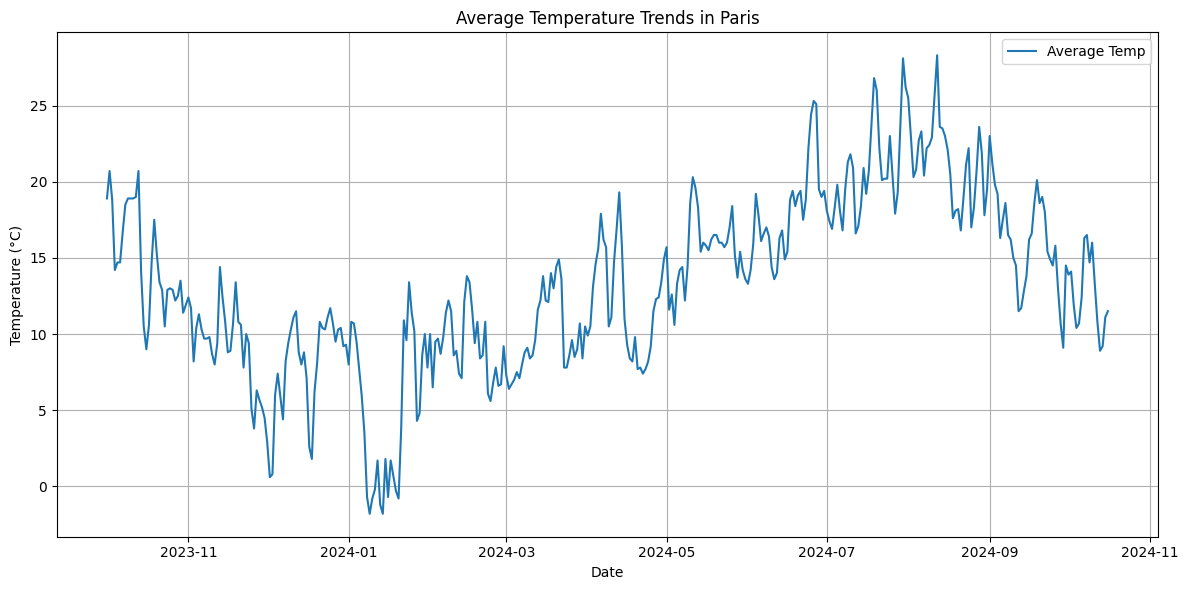

In [ ]:
# Plot temperature data over time
plt.figure(figsize=(12, 6))

plt.plot(df['datetime'], df['temp'], label='Average Temp', linestyle='-')
plt.title('Average Temperature Trends in Paris')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

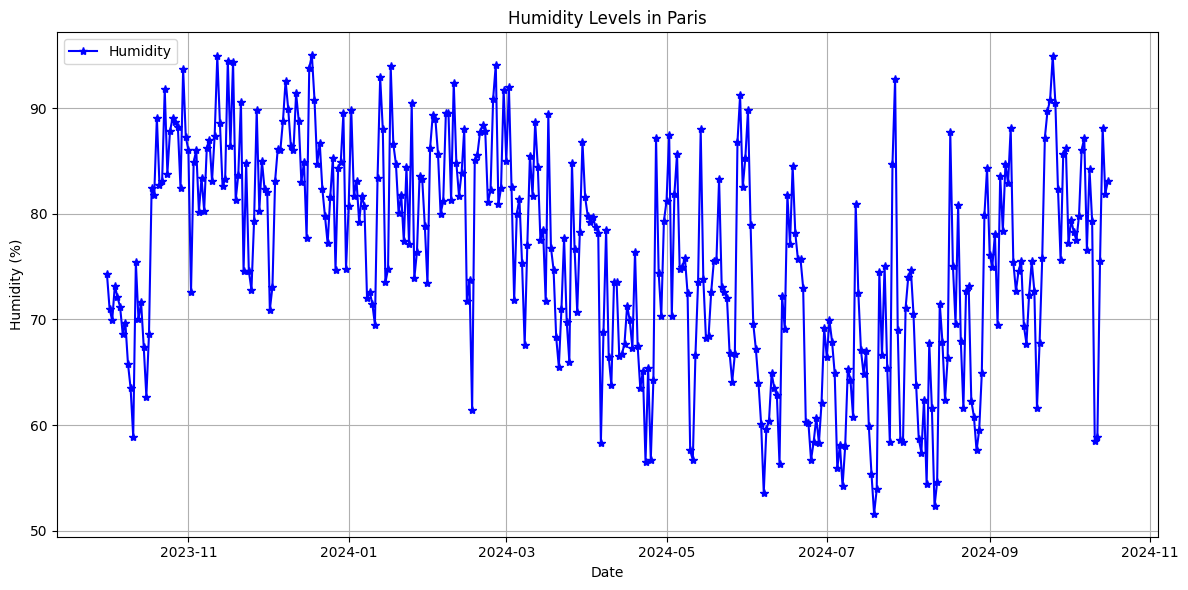

In [ ]:
# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['humidity'], label='Humidity', color='blue', marker='*')
plt.title('Humidity Levels in Paris')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

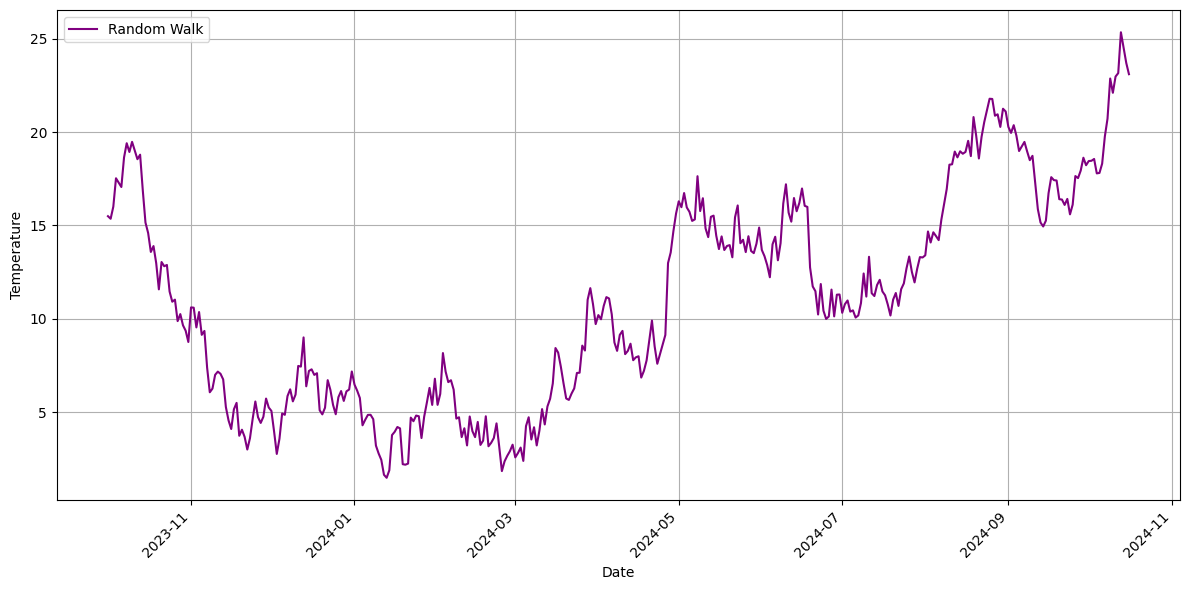

In [ ]:
# Generate a random walk
np.random.seed(42)  # for reproducibility
random_walk = np.cumsum(np.random.randn(len(df)))

# Plot only the random walk
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], random_walk + 15, label='Random Walk', linestyle='-', color='purple') #Added constant for better visualization

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exercise 2
The dataset has 33 columns (features). Explain the meaning and values in each column.

    For example, what does feature “moonphase” mean? What are its values?


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_paris_temperature.csv')

# Display the first few rows
print(df.head())

# Display the data types and non-null counts for each column
print(df.info())

           name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France  2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France  2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France  2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France  2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France  2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1     

## Column Descriptions for Paris Temperature Dataset

| **Column**         | **Meaning**                                                                                                                 | **Values**                                   |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|
| **name**                | Location where the weather data was collected. Useful in multi-location datasets or to confirm location context.           | "Paris,France"                                     |
| **datetime**            | Date of the observation in datetime format. Helps in analyzing weather trends over time.                                        | From "2023-10-01" to "2024-10-16"                                       |
| **tempmax**             | Maximum temperature recorded during the day in degrees Celsius, indicating the peak warmth for the day.                        | From -1.3 to 36.2                                        |
| **tempmin**             | Minimum temperature recorded during the day in degrees Celsius.                                | From -4.1 to 21.2                                        |
| **temp**                | Average daily temperature in degrees Celsius. Represents the mean temperature throughout the day.                              | From -1.8 to 28.3                                         |
| **feelslikemax**        | Maximum perceived temperature (feels-like) in degrees Celsius, accounting for wind chill and humidity.                         | From -5.5 to 39                                        |
| **feelslikemin**        | Minimum perceived temperature (feels-like) in degrees Celsius, providing insight into perceived coldest conditions.            | From -7.3 to 21.2                                        |
| **feelslike**           | Average perceived temperature in degrees Celsius. Takes into account both wind chill and humidity for a more accurate feel.    | From -6.3 to 29.6                                         |
| **dew**                 | Dew point temperature in degrees Celsius, showing the temperature at which air becomes saturated with moisture.                | From -6.1 to 20.3                                         |
| **humidity**            | Relative humidity percentage, showing the air's moisture level, with higher values indicating more moisture.                   | From 51.6 to 95                                           |
| **precip**              | Total precipitation in millimeters, providing the total rainfall or snowfall for the day.                                      | From 0 to 25.008                                        |
| **precipprob**          | Probability of precipitation as a percentage, indicating the chance of rain or snow occurring during the day.                  | From 0 to 100 (0 for no precipitation)                                            |
| **precipcover**         | Percentage of time precipitation was present during the day, describing the duration of rain or snow.                          | From 0 to 75 (0 for no precipitation)                                            |
| **preciptype**          | Type of precipitation (rain, snow, etc.). Helps classify the form of precipitation for specific weather conditions.            | "rain", "rain,snow", "rain,freezing", empty for no precipitation                                      |
| **snow**                | Total snowfall in millimeters, indicating the amount of snow accumulated during the day.                                       | 0, 0.1, 0.2, 0.3, 0.6, 5.4                                         |
| **snowdepth**           | Snow depth in millimeters, representing the cumulative depth of snow on the ground.                                            | From 0.1 to 3.9, 0 for most days without snow                                        |
| **windgust**            | Maximum wind gust speed in kilometers per hour, measuring sudden, short bursts of high wind.                                   | From 14.4 to 92.2                                        |
| **windspeed**           | Average wind speed in kilometers per hour, providing an overview of general windiness during the day.                          | From 6.8 to 44.3                                         |
| **winddir**             | Average wind direction in degrees (0 to 360), indicating the prevailing wind direction.                                        | From 0.4 to 358.2 (compass degree)                                            |
| **sealevelpressure**    | Sea-level pressure in hPa, useful for understanding atmospheric pressure patterns that affect weather conditions.              | From 979.7 to 1042.8                                         |
| **cloudcover**          | Average cloud cover percentage, showing the extent of cloudiness throughout the day.                                           | From 13 to 100                                            |
| **visibility**          | Average visibility distance in kilometers, showing how clear or obstructed the view is (e.g., fog reduces visibility).         | From 5.1 to 39.1                                         |
| **solarradiation**      | Average solar radiation in watts per square meter (W/m²), indicating the strength of solar energy reaching the surface.       | From 0 to 169.8                                           |
| **solarenergy**         | Total solar energy in megajoules per square meter (MJ/m²) received throughout the day. Useful for solar energy analysis.       | From 0.0 to 14.7                                         |
| **uvindex**             | Maximum UV index for the day, indicating the level of ultraviolet radiation and potential risk of sunburn.                    | From 0 to 8 (integer value)                                              |
| **severerisk**          | Index from 0 to 10 representing the risk of severe weather, with higher values indicating more hazardous conditions.          | 10                                             |
| **sunrise**             | Time of sunrise in ISO format, providing the exact time the sun rises, which can vary with seasons.                           | ISO 8601 format "YYYY-MM-DDThh:mm:ss"                               |
| **sunset**              | Time of sunset in ISO format, indicating when the sun sets, which is essential for calculating daylight hours.                 | ISO 8601 format "YYYY-MM-DDThh:mm:ss"                               |
| **moonphase**           | Numeric representation of the moon phase, where 0 = new moon and 1 = full moon, affecting nighttime lighting.               | From 0 to 0.98                                          |
| **conditions**          | Brief summary of weather conditions, describing general weather patterns like rain or cloudiness.                             | "Clear", "Overcast", "Partially cloudly", "Snow, Rain, Freezing Drizzle",
|                         |                                             | "Rain, Overcast", "Snow, Rain, Overcast", "Snow, Rain, Partially cloudly"                            |
| **description**         | Detailed text explaining the day’s weather, providing context about specific events like "morning showers."                   | Text describing weather of the day                |
| **icon**                | Icon code representing the weather visually (e.g., “rain”, “partly-cloudy-day”), useful for quick weather snapshots.          | "clear day", "rain", "snow", "cloudy", "partly-cloudy-day"                         |
| **stations**            | List of weather station IDs that provided data for the day, showing data sources for verification or comparison.             | CSV list of strings identifying the stations                          |


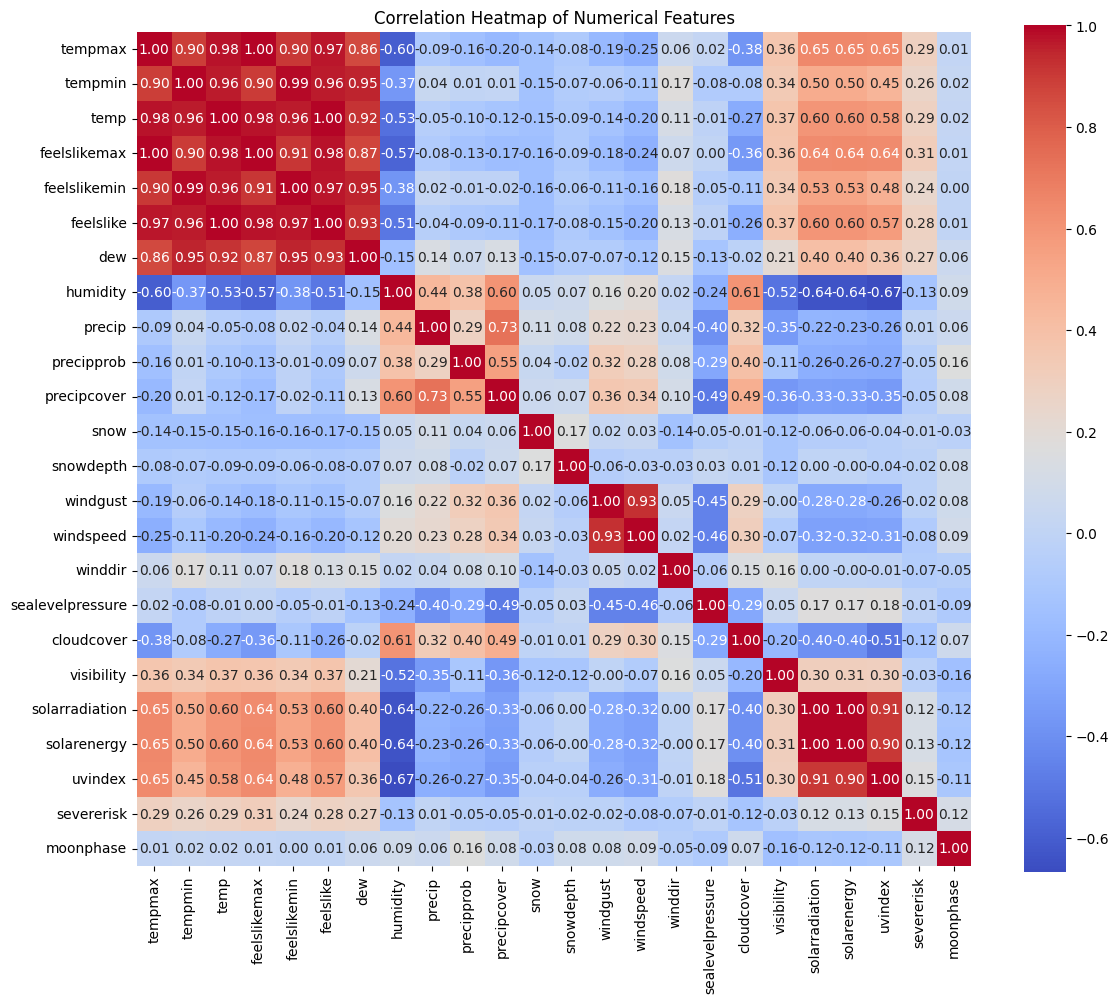

In [ ]:
# Compute correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


# Exercise 3:
Determine numerical features and categorical features.

In [ ]:
# Identify numerical features (int64 and float64 data types)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Features:", numerical_features)

# Identify categorical features (object data type)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)


Numerical Features: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']
Categorical Features: ['name', 'datetime', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']


In [ ]:
# Display summary statistics for numerical features
print(df[numerical_features].describe())

          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  382.000000  382.000000  382.000000    382.000000    382.000000   
mean    16.802356   10.096859   13.279319     16.541623      8.974869   
std      6.840083    5.057506    5.819955      7.388110      6.197290   
min     -1.300000   -4.100000   -1.800000     -5.500000     -7.300000   
25%     11.800000    6.625000    9.300000     11.800000      4.600000   
50%     16.150000   10.200000   13.050000     16.150000     10.200000   
75%     21.850000   13.600000   17.575000     21.850000     13.600000   
max     36.200000   21.200000   28.300000     39.000000     21.200000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  382.000000  382.000000  382.000000  382.000000  382.000000  ...   
mean    12.624346    8.784293   76.118586    2.053552   71.432461  ...   
std      6.674208    4.779705   10.214621    3.939574   44.425978  ...   
min     -6.300000   -6.100000   51.600000    0

In [ ]:
# Display unique values for categorical features to understand their categories
for col in categorical_features:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'name':
['Paris,France']

Unique values in 'datetime':
['2023-10-01' '2023-10-02' '2023-10-03' '2023-10-04' '2023-10-05'
 '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09' '2023-10-10'
 '2023-10-11' '2023-10-12' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-24' '2023-10-25'
 '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29' '2023-10-30'
 '2023-10-31' '2023-11-01' '2023-11-02' '2023-11-03' '2023-11-04'
 '2023-11-05' '2023-11-06' '2023-11-07' '2023-11-08' '2023-11-09'
 '2023-11-10' '2023-11-11' '2023-11-12' '2023-11-13' '2023-11-14'
 '2023-11-15' '2023-11-16' '2023-11-17' '2023-11-18' '2023-11-19'
 '2023-11-20' '2023-11-21' '2023-11-22' '2023-11-23' '2023-11-24'
 '2023-11-25' '2023-11-26' '2023-11-27' '2023-11-28' '2023-11-29'
 '2023-11-30' '2023-12-01' '2023-12-02' '2023-12-03' '2023-12-04'
 '2023-12-05' '2023-12-06' '2023-12-07' '2023-12-08' '2023-12-09'
 '20

# Exercise 4:

## a. SARIMA model
Applying SARIMA model (p,d,q)(P,D,Q)m. Determine the differencing order. Find the best possible parameters (p,d,q) (P,D,Q), m in terms of AIC metrics and Root Mean Squared Error (RMSE) (on testset). Present the result clearly with AIC, Loglikelihood, BIC, RMSE, R2, MAPE for the best model.

### Definition:
SARIMA (Seasonal Autoregressive Integrated Moving Average) is an extension of ARIMA that accounts for seasonality in time series data. It is represented as:
$$
SARIMA(p, d, q)(P, D, Q)_m
$$
Where:
- **(p, d, q)**: Non-seasonal components
  - \( p \): Order of the autoregressive (AR) terms
  - \( d \): Degree of differencing to make the series stationary
  - \( q \): Order of the moving average (MA) terms
- **(P, D, Q)**: Seasonal components
  - \( P \): Order of the seasonal AR terms
  - \( D \): Seasonal differencing to make the series stationary
  - \( Q \): Order of the seasonal MA terms
- \( m \): Seasonal period
---
### Model Selection:
1. **AIC (Akaike Information Criterion)**:
   Measures model quality based on goodness of fit and complexity (lower is better).
   $$
   \text{AIC} = 2k - 2\ln(L)
   $$
   Where:
   - \( k \): Number of parameters in the model
   - \( L \): Log-likelihood of the model

2. **Log-Likelihood**:
   Measures how well the model explains the observed data:
   $$
   \text{Log-Likelihood} = \ln(L)
   $$

3. **BIC (Bayesian Information Criterion)**:
   Penalizes model complexity more than AIC (lower is better):
   $$
   \text{BIC} = k\ln(n) - 2\ln(L)
   $$
   Where \( n \) is the number of observations.

4. **Root Mean Squared Error (RMSE)**:
   Measures prediction accuracy:
   $$
   \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}
   $$

5. **R² (Coefficient of Determination)**:
   Measures how well the model explains variability in the target:
   $$
   R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
   $$

6. **MAPE (Mean Absolute Percentage Error)**:
   Measures prediction error as a percentage:
   $$
   \text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
   $$

In [ ]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/time_series/paris_temperature.csv')

In [ ]:
data = data[['temp','datetime']]  # Focus on the main temperature column for forecasting
data = data.dropna()

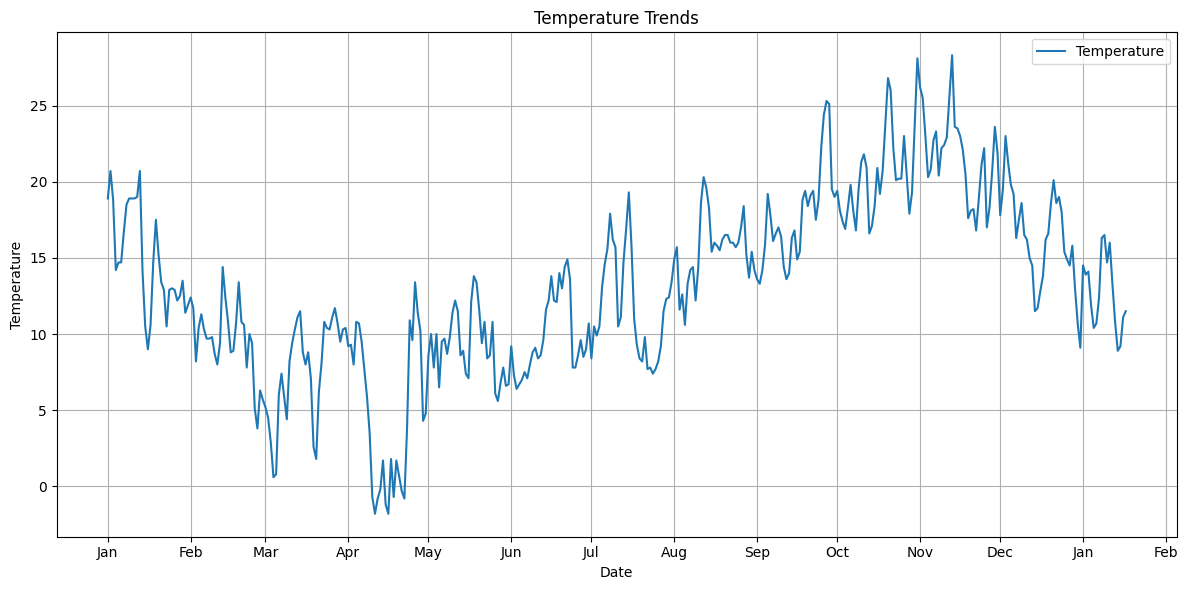

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['temp'], label="Temperature")

# Set x-axis major locator to month and formatter to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trends")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

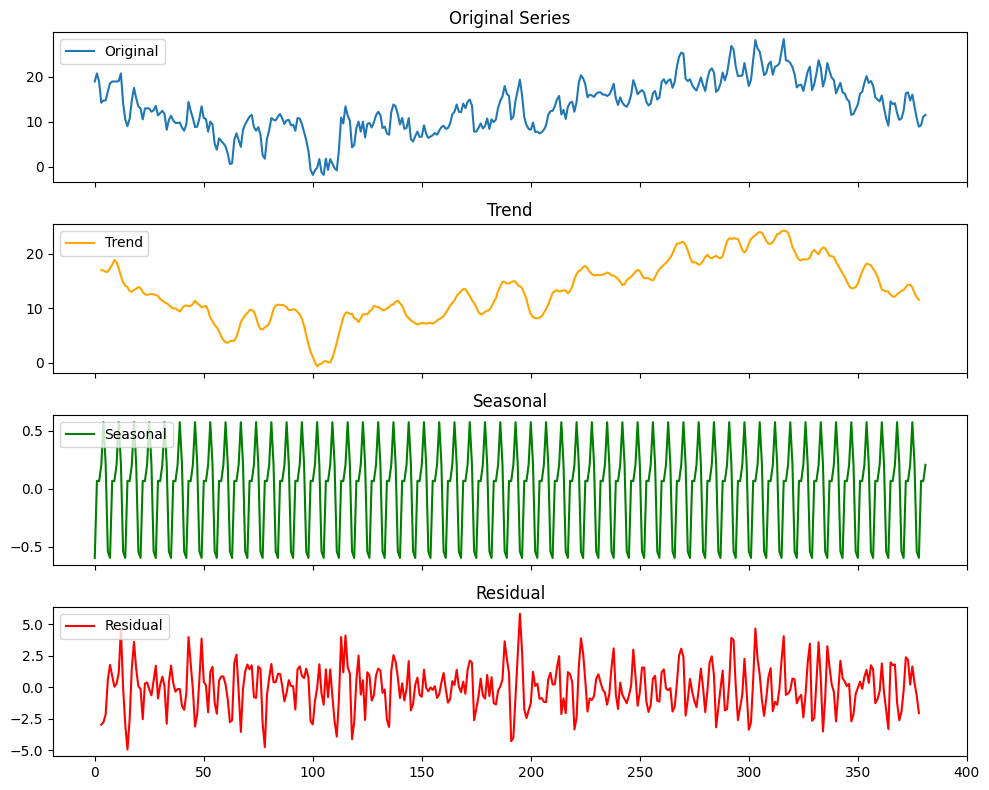

Trend:
 0          NaN
1          NaN
2          NaN
3    16.957143
4    16.900000
Name: trend, dtype: float64
Seasonal:
 0   -0.594636
1    0.070488
2    0.066714
3    0.208009
4    0.575205
Name: seasonal, dtype: float64
Residual:
 0         NaN
1         NaN
2         NaN
3   -2.965152
4   -2.775205
Name: resid, dtype: float64


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decompose_result = seasonal_decompose(data['temp'], model='additive', period=7)  # Adjust period for known seasonality

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original series
axes[0].plot(data['temp'], label='Original')
axes[0].legend(loc='upper left')
axes[0].set_title('Original Series')

# Trend component
axes[1].plot(decompose_result.trend, label='Trend', color='orange')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Seasonal component
axes[2].plot(decompose_result.seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

# Residual component
axes[3].plot(decompose_result.resid, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

# Optionally, you can print the decomposed components
print("Trend:\n", decompose_result.trend.head())
print("Seasonal:\n", decompose_result.seasonal.head())
print("Residual:\n", decompose_result.resid.head())


Residuals: The residuals (what's left after removing the trend and seasonality) appear to be random and lack visible patterns. This randomness is an indicator that the chosen decomposition parameters (period=7) may be appropriate.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def check_stationarity(timeseries):

    print("Performing Dickey-Fuller Test:")
    result = adfuller(timeseries, autolag='AIC')  # Perform ADF test
    test_statistic = result[0]
    p_value = result[1]
    lags_used = result[2]
    n_obs = result[3]
    critical_values = result[4]  # Critical values for the test

    # Print results
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"#Lags Used: {lags_used}")
    print(f"#Observations Used: {n_obs}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.4f}")

    # Conclusion
    if p_value < 0.05:
        print("\nConclusion: The time series is stationary (reject null hypothesis).")
    else:
        print("\nConclusion: The time series is NOT stationary (fail to reject null hypothesis).")


check_stationarity(data['temp'])


Performing Dickey-Fuller Test:
Test Statistic: -2.7426
p-value: 0.0669
#Lags Used: 3
#Observations Used: 378
Critical Values:
   1%: -3.4478
   5%: -2.8692
   10%: -2.5709

Conclusion: The time series is NOT stationary (fail to reject null hypothesis).


In [ ]:
# Apply first-order differencing
data['temp_diff'] = data['temp'].diff()
data = data.dropna()

In [ ]:
check_stationarity(data['temp_diff'])


Performing Dickey-Fuller Test:
Test Statistic: -14.7942
p-value: 0.0000
#Lags Used: 2
#Observations Used: 378
Critical Values:
   1%: -3.4478
   5%: -2.8692
   10%: -2.5709

Conclusion: The time series is stationary (reject null hypothesis).


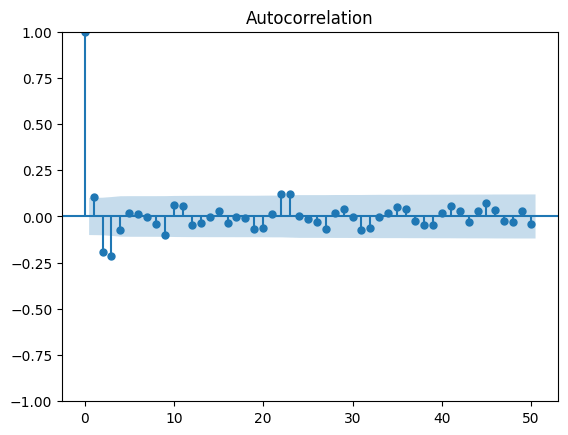

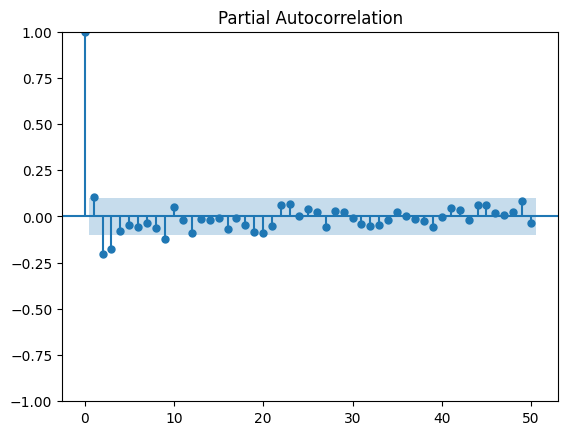

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the data
plot_acf(data['temp_diff'], lags=50)
plot_pacf(data['temp_diff'], lags=50)
plt.show()


- p=1: Based on the PACF's cutoff after lag 1.
- d=1: Differencing order is given.
- q=1: Based on the ACF's cutoff after lag 1.
Combining m=7 -> SARIMA(1,1,1)(1,1,1,7)

In [ ]:
# Assuming 'data' has datetime index and 'temp' column
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Split data into train and test sets
train = data['2023-10-01':'2024-09-15']['temp']
test = data['2024-09-16':]['temp']

### Base Model with SARIMA

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Fit SARIMA model
best_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
result = best_model.fit(disp=False)

# Predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mape = mean_absolute_percentage_error(test, predictions) * 100

# Extract AIC, BIC, Log-Likelihood
aic = result.aic
bic = result.bic
log_likelihood = result.llf

# Print all evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"-----------------------------------")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"Log-Likelihood: {log_likelihood:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model Evaluation Metrics:
-----------------------------------
AIC: 1439.4019
BIC: 1458.4426
Log-Likelihood: -714.7009
Root Mean Squared Error (RMSE): 2.8869
R² Score: 0.1260
Mean Absolute Percentage Error (MAPE): 18.49%


Strengths:
- The model performs reasonably well in terms of AIC, RMSE, and MAPE.
- These metrics suggest a functional SARIMA model with room for optimization.

Weaknesses:
- The low R^2 indicates the model explains very little variance, suggesting it’s not fully capturing the dynamics of the data.
- The BIC and Log-Likelihood imply that the model might be slightly over-parameterized.

=> Test alternative models (e.g., SARIMAX, Prophet, or LSTM) for potentially better performance.

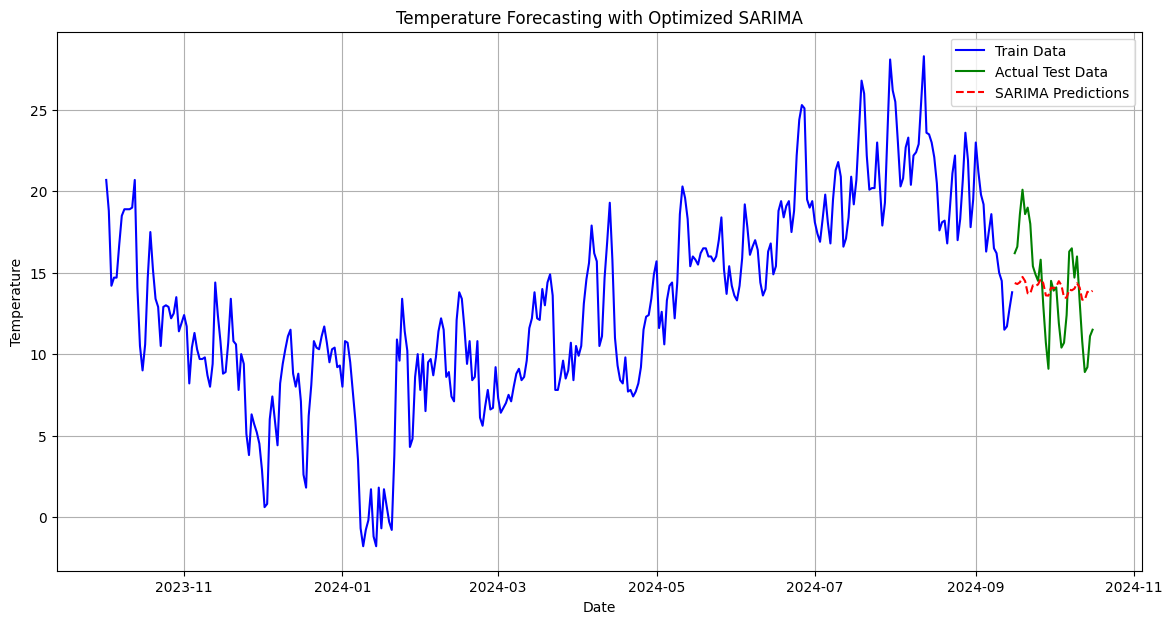

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label="Train Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(predictions.index, predictions, label="SARIMA Predictions", color="red", linestyle="--")
plt.title("Temperature Forecasting with Optimized SARIMA")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume train and test are already defined
scaler = MinMaxScaler()

# Fit and transform the train set
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
train_scaled = pd.Series(train_scaled.flatten(), index=train.index)

# Transform the test set
test_scaled = scaler.transform(test.values.reshape(-1, 1))
test_scaled = pd.Series(test_scaled.flatten(), index=test.index)


In [ ]:
import optuna

def sarima_objective(trial):
    # Define the parameter ranges
    p = trial.suggest_int("p", 0, 3)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 0, 3)
    P = trial.suggest_int("P", 0, 3)
    D = trial.suggest_int("D", 0, 2)
    Q = trial.suggest_int("Q", 0, 3)
    m = trial.suggest_int("m", 5, 15)

    try:
        # Define SARIMA model
        model = SARIMAX(
            train,
            order=(p, d, q),
            seasonal_order=(P, D, Q, m),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        # Make predictions on the test set
        predictions = result.predict(start=test.index[0], end=test.index[-1])

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(test, predictions))
        return rmse  # Minimize RMSE

    except Exception as e:
        return float("inf")  # Handle errors gracefully


In [ ]:
# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Optimize the SARIMA parameters
study.optimize(sarima_objective, n_trials=50)

# Print the best parameters
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2024-11-21 06:13:12,097] A new study created in memory with name: no-name-a9f45abb-c92c-45e5-b45b-6cad5d4cfd72
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
[I 2024-11-21 06:13:13,720] Trial 0 finished with value: 22.060772540792183 and parameters: {'p': 3, 'd': 2, 'q': 0, 'P': 3, 'D': 1, 'Q': 0, 'm': 14}. Best is trial 0 with value: 22.060772540792183.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Va

Best Parameters: {'p': 1, 'd': 1, 'q': 3, 'P': 1, 'D': 0, 'Q': 2, 'm': 11}
Best RMSE: 2.92004598440388


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
best_params = study.best_params

# Fit SARIMA model with the best parameters
best_model = SARIMAX(
    train,
    order=(best_params["p"], best_params["d"], best_params["q"]),
    seasonal_order=(best_params["P"], best_params["D"], best_params["Q"], best_params["m"]),
    enforce_stationarity=False,
    enforce_invertibility=False
)
result = best_model.fit(disp=False)

# Predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mape = mean_absolute_percentage_error(test, predictions) * 100

# Extract AIC, BIC, Log-Likelihood
aic = result.aic
bic = result.bic
log_likelihood = result.llf

# Print all evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"-----------------------------------")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"Log-Likelihood: {log_likelihood:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model Evaluation Metrics:
-----------------------------------
AIC: 1362.8464
BIC: 1393.0676
Log-Likelihood: -673.4232
Root Mean Squared Error (RMSE): 2.9200
R² Score: 0.1058
Mean Absolute Percentage Error (MAPE): 18.61%


The current model is overall better than the base model:
- Lower AIC and BIC indicate a better trade-off between fit and complexity.
- Improved MAPE reflects better accuracy in percentage terms.
- Slightly higher RMSE and lower R² suggest comparable predictive performance.

The differences are not drastic, but the current model is preferable due to its better fit (AIC, BIC, Log-Likelihood) and improved percentage error (MAPE).

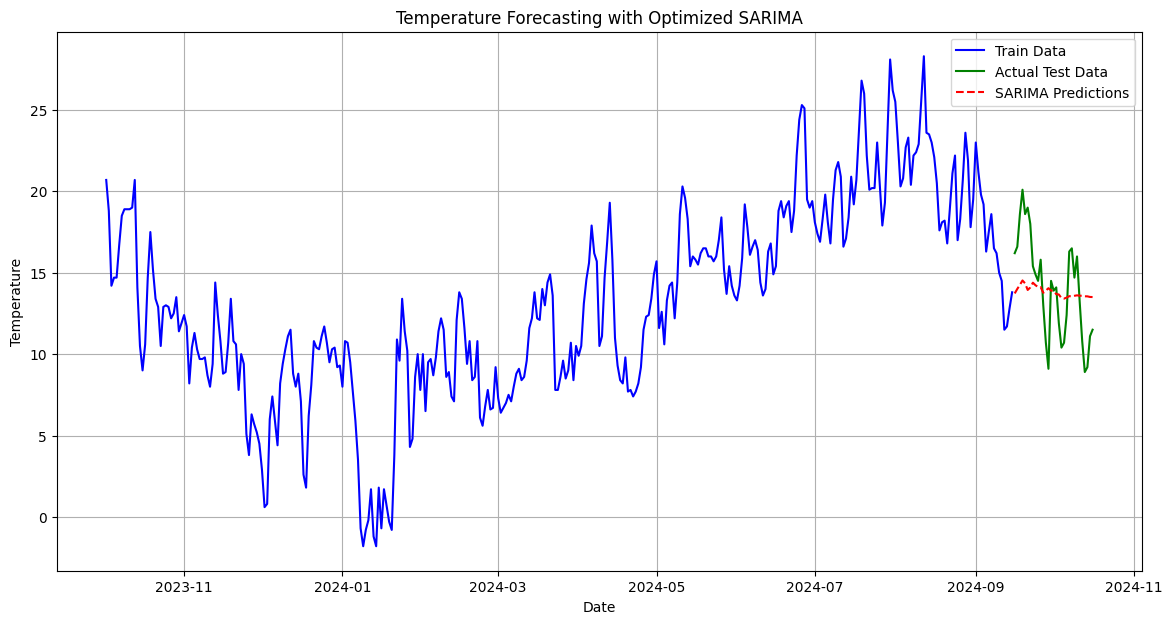

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label="Train Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(predictions.index, predictions, label="SARIMA Predictions", color="red", linestyle="--")
plt.title("Temperature Forecasting with Optimized SARIMA")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


## b. Prophet model
Use Prophet model and do the same task. Try different setting for Prophet to get the best result.

### Definition:
Prophet is an additive time series forecasting model developed by Facebook. It handles seasonality, holidays, and trends. The model equation is:
$$
y(t) = g(t) + s(t) + h(t) + \epsilon_t
$$
Where:
- $g(t)$: Trend function
- $s(t)$: Seasonality
- $h(t)$: Holiday effects
- $\epsilon_t$: Error term (white noise)
---
### Model Components:
1. **Trend**:
   Describes the long-term increase or decrease in the data.
2. **Seasonality**:
   Captures periodic fluctuations.
3. **Holiday Effects**:
   Accounts for irregular changes during holidays.


In [ ]:
data_b = pd.read_csv('/content/drive/MyDrive/time_series/paris_temperature.csv')


In [ ]:
df_prophet =data_b[['datetime', 'temp']].rename(columns={'datetime':'ds', 'temp':'y'})
df_prophet.head(2)

ds     y
0  2023-10-01  18.9
1  2023-10-02  20.7

In [ ]:
len(df_prophet)

382

In [ ]:
print(df_prophet.ds.min(), df_prophet.ds.max())

2023-10-01 2024-10-16


In [ ]:
train_prophet = df_prophet.iloc[:-30]
test_prophet = df_prophet.iloc[-30:]

In [ ]:
print(len(test_prophet), len(train_prophet))

30 352


In [ ]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr4xbxzg/lf79dj08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr4xbxzg/rn_oug1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44302', 'data', 'file=/tmp/tmprr4xbxzg/lf79dj08.json', 'init=/tmp/tmprr4xbxzg/rn_oug1b.json', 'output', 'file=/tmp/tmprr4xbxzg/prophet_modelxnsqoujq/prophet_model-20241121061850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
periods_to_test = [7, 14, 30]
validation_results = []
for period in periods_to_test:
    print(f"Testing with forecast period: {period} days")

    # Create future dataframe with the specified period
    future = model_prophet.make_future_dataframe(periods=period)

    # Forecast
    forecast = model_prophet.predict(future)

    # Extract the test forecast (last 30 days of the forecast)
    test_forecast = forecast.iloc[-30:]  # Align with test_prophet
    y_pred = test_forecast['yhat'].values
    y_true = test_prophet['y'].values

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE for period {period}: {rmse:.4f}")

    # Store results
    validation_results.append({'period': period, 'RMSE': rmse})

# Find the best period based on RMSE
best_period = min(validation_results, key=lambda x: x['RMSE'])
print(f"\nBest period: {best_period['period']} days with RMSE: {best_period['RMSE']:.4f}")


Testing with forecast period: 7 days
RMSE for period 7: 8.0800
Testing with forecast period: 14 days
RMSE for period 14: 8.3785
Testing with forecast period: 30 days
RMSE for period 30: 9.0345

Best period: 7 days with RMSE: 8.0800


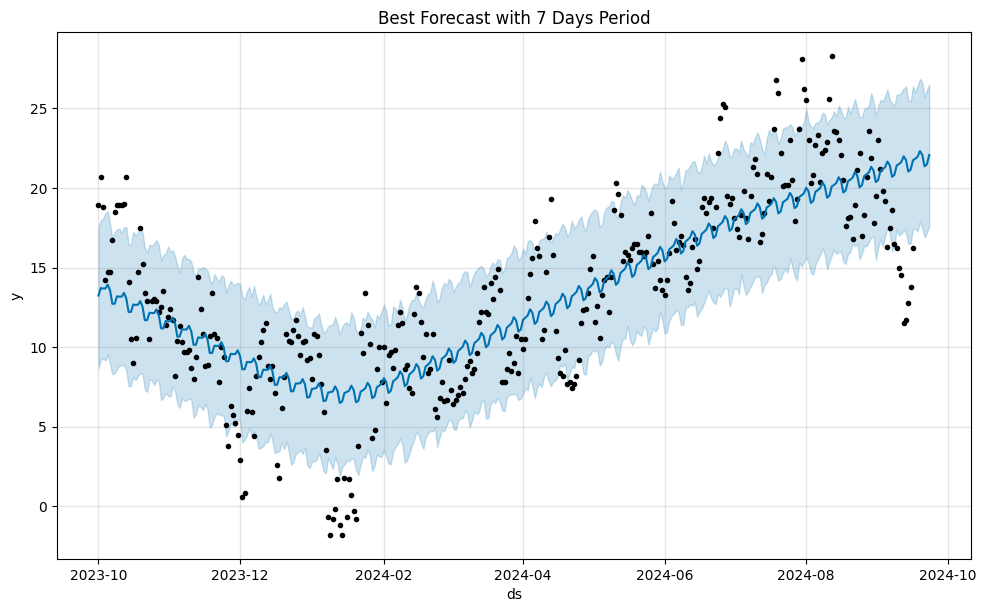

In [ ]:
# Use the best period for final forecasting
final_future = model_prophet.make_future_dataframe(periods=best_period['period'])
final_forecast = model_prophet.predict(final_future)

# Plot the final forecast
fig = model_prophet.plot(final_forecast)
plt.title(f"Best Forecast with {best_period['period']} Days Period")
plt.show()

Trend Line (Blue Line):
- The blue line represents the predicted trend over time.
- It effectively captures the overall increasing trend from October 2023 to October 2024, which reflects an expected warming pattern over the seasons.

Seasonal Patterns:
- The periodic ups and downs of the forecast reflect the 7-day seasonality you specified in the Prophet model.
- The model appears to capture these weekly variations reasonably well.

Uncertainty Interval (Blue Shaded Area):
- The shaded region represents the confidence interval of the prediction.
- It widens as you move further into the future, indicating increasing uncertainty in the predictions, which is expected in time series forecasting.

Actual Data Points (Black Dots):
- The black dots represent the actual observed data points.
- The model fits well in some parts but misses certain data points, especially during sharp dips in the winter months (e.g., around December 2023 and January 2024).
During the warmer months, it aligns better with the data.

Add additional seasonality

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr4xbxzg/j2_553bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr4xbxzg/9o1eawtl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47995', 'data', 'file=/tmp/tmprr4xbxzg/j2_553bx.json', 'init=/tmp/tmprr4xbxzg/9o1eawtl.json', 'output', 'file=/tmp/tmprr4xbxzg/prophet_modelqlrjlbxx/prophet_model-20241121062122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error (RMSE): 3.3569
Mean Absolute Error (MAE): 2.7324
R² Score: -0.1618


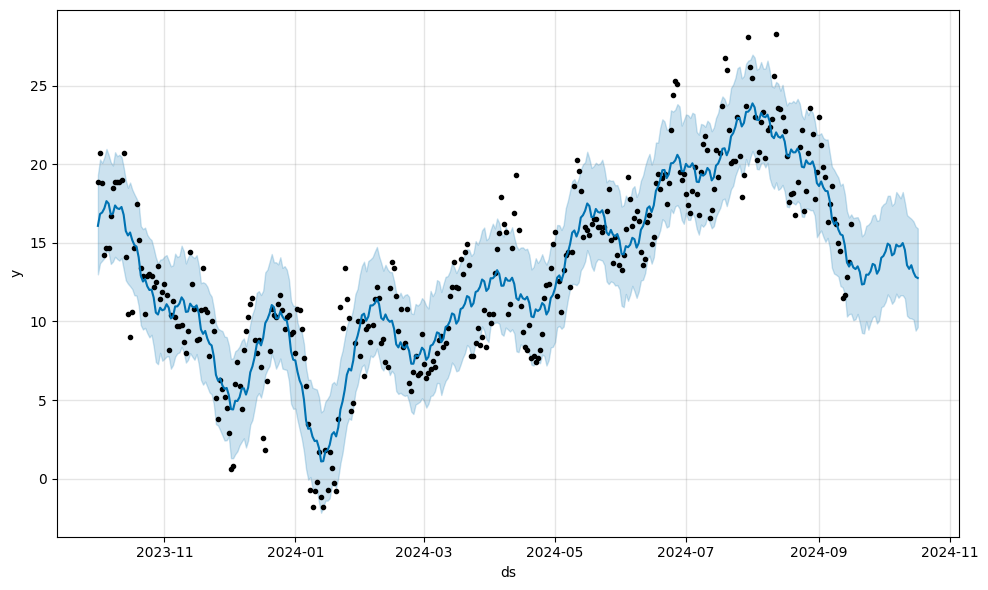

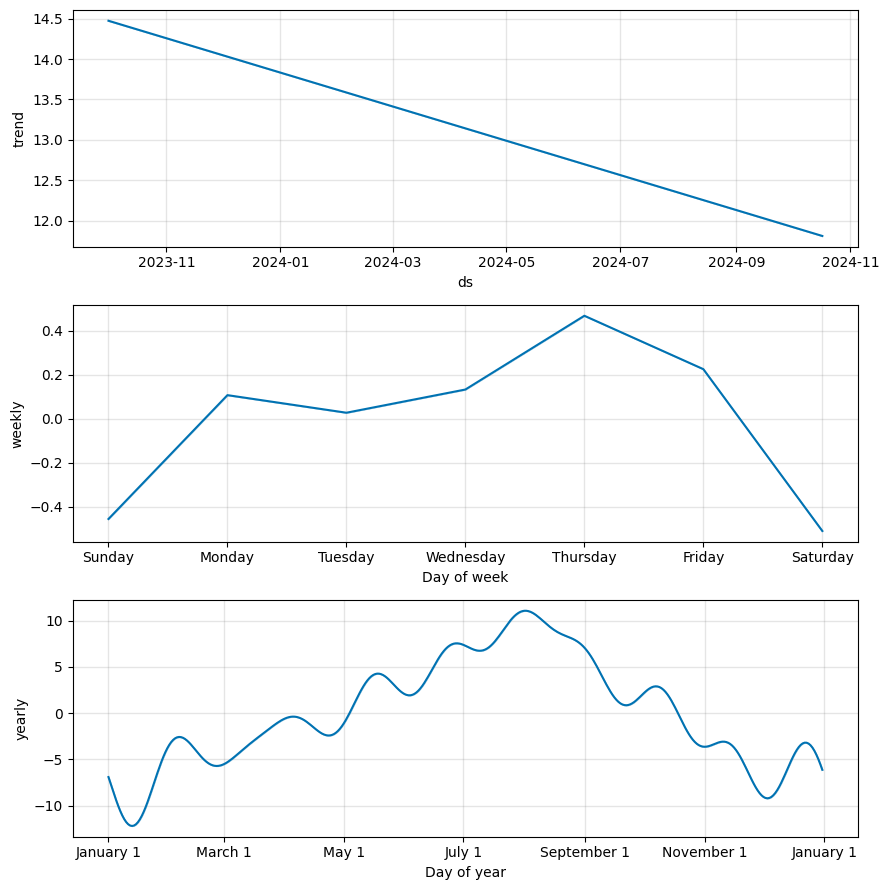

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split the data into training and testing
train_prophet_2 = df_prophet.iloc[:-30]
test_prophet_2 = df_prophet.iloc[-30:]

# Initialize the Prophet model with custom parameters
model_prophet_2 = Prophet(
    changepoint_prior_scale=0.025,  # Controls trend flexibility
    seasonality_prior_scale=0.1,  # Controls seasonality flexibility
    yearly_seasonality=True  # Assumes yearly seasonality is significant
)

# Add additional seasonality if needed (e.g., weekly seasonality)
model_prophet_2.add_seasonality(name='weekly', period=7, fourier_order=3)

# Fit the model to the training data
model_prophet_2.fit(train_prophet_2)

# Create a future dataframe for predictions
future2 = model_prophet_2.make_future_dataframe(periods=31)  # Forecast next 30 days to match the test set
forecast2 = model_prophet_2.predict(future2)

# Extract predictions for the test set
test_forecast2 = forecast2.iloc[-30:]  # Match the last 30 days of the test set

# Evaluate the model
y_true2 = test_prophet_2['y'].values
y_pred2 = test_forecast2['yhat'].values  # Corrected to use `test_forecast2`

rmse = np.sqrt(mean_squared_error(y_true2, y_pred2))
mae = mean_absolute_error(y_true2, y_pred2)
r2 = r2_score(y_true2, y_pred2)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the forecast
fig1 = model_prophet_2.plot(forecast2)

# Plot forecast components (trend and seasonality)
fig2 = model_prophet_2.plot_components(forecast2)

Root Mean Squared Error (RMSE):
- 3.3569 indicates the average deviation of predictions from actual values is around 3.35 units. While acceptable for some cases, it shows the model is not fully accurate in capturing short-term fluctuations.

Mean Absolute Error (MAE):
- 2.7324 shows the average absolute error between the predicted and actual values. This suggests reasonable accuracy, but there is room for improvement.

R² Score:
- -0.1618 is a negative score, indicating that the model does not perform better than a simple mean-based model. A negative R² shows the model is not fitting the data well overall.

In [ ]:
forecast2

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2023-10-01  14.473129   12.998570   19.326175    14.473129    14.473129   
1   2023-10-02  14.466165   13.707100   20.309773    14.466165    14.466165   
2   2023-10-03  14.459201   13.864200   20.095092    14.459201    14.459201   
3   2023-10-04  14.452237   14.032378   20.446575    14.452237    14.452237   
4   2023-10-05  14.445273   14.484634   20.981017    14.445273    14.445273   
..         ...        ...         ...         ...          ...          ...   
378 2024-10-13  11.840689   10.219136   16.644758    11.840689    11.840690   
379 2024-10-14  11.833725   10.193547   16.532310    11.833725    11.833725   
380 2024-10-15  11.826761   10.126566   16.369721    11.826761    11.826761   
381 2024-10-16  11.819797    9.416481   16.044626    11.819797    11.819797   
382 2024-10-17  11.812833    9.641488   15.921888    11.812833    11.812833   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          1.610560              1.610560              1.610560 -0.455419   
1          2.373926              2.373926              2.373926  0.108060   
2          2.478672              2.478672              2.478672  0.028044   
3          2.746192              2.746192              2.746192  0.133657   
4          3.213644              3.213644              3.213644  0.469233   
..              ...                   ...                   ...       ...   
378        1.506235              1.506235              1.506235 -0.455419   
379        1.747684              1.747684              1.747684  0.108060   
380        1.309261              1.309261              1.309261  0.028044   
381        1.026581              1.026581              1.026581  0.133657   
382        0.951240              0.951240              0.951240  0.469233   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0       -0.455419     -0.455419  2.065979      2.065979      2.065979   
1        0.108060      0.108060  2.265866      2.265866      2.265866   
2        0.028044      0.028044  2.450628      2.450628      2.450628   
3        0.133657      0.133657  2.612535      2.612535      2.612535   
4        0.469233      0.469233  2.744411      2.744411      2.744411   
..            ...           ...       ...           ...           ...   
378     -0.455419     -0.455419  1.961654      1.961654      1.961654   
379      0.108060      0.108060  1.639625      1.639625      1.639625   
380      0.028044      0.028044  1.281217      1.281217      1.281217   
381      0.133657      0.133657  0.892924      0.892924      0.892924   
382      0.469233      0.469233  0.482007      0.482007      0.482007   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
378                   0.0                         0.0   
379                   0.0                         0.0   
380                   0.0                         0.0   
381                   0.0                         0.0   
382                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  16.083689  
1                           0.0  16.840091  
2                           0.0  16.937873  
3                           0.0  17.198429  
4                           0.0  17.658917  
..                          ...        ...  
378                         0.0  13.346925  
379                         0.0  13.581410  
380                         0.0  13.136023  
381                         0.0  12.846378  
382                         0.0  12.764073  

[383 rows x 19 columns]

In [ ]:
forecast_prophet_test = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_prophet_test

ds       yhat  yhat_lower  yhat_upper
0   2023-10-01  16.083689   12.998570   19.326175
1   2023-10-02  16.840091   13.707100   20.309773
2   2023-10-03  16.937873   13.864200   20.095092
3   2023-10-04  17.198429   14.032378   20.446575
4   2023-10-05  17.658917   14.484634   20.981017
..         ...        ...         ...         ...
378 2024-10-13  13.346925   10.219136   16.644758
379 2024-10-14  13.581410   10.193547   16.532310
380 2024-10-15  13.136023   10.126566   16.369721
381 2024-10-16  12.846378    9.416481   16.044626
382 2024-10-17  12.764073    9.641488   15.921888

[383 rows x 4 columns]

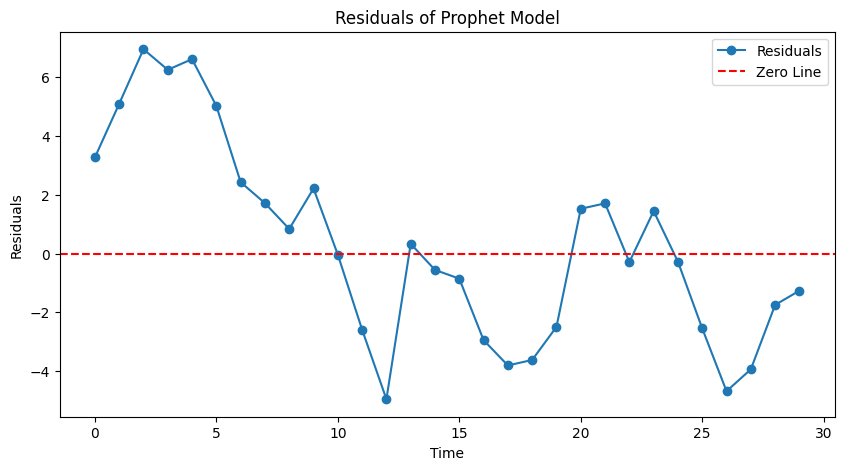

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_true2 - y_pred2

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='-', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.title("Residuals of Prophet Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()


# Exercise 5:
Choose and apply a Probabilistic Machine Learning model (Linear Regression, LightGBM Regressor, XGBoost Regressor) on these trainset and testset.

Out-Of-Sample split for the dataset = Split randomly 80-20 your dataset, Do not respect the evolution in time of your time series.

Hyper-parameter tuning as hard as you could (with Optuna or Grid Search) to get the best result.

Compute with RMSE. R2. MAPE metrics.


**In this part, I would love to use 3 models are : Linear Regression, LightGBM Regressor, XGBoost Regressor to compare and indicate the most suitable one.**




## Mathematical Formulas for Each Model

### **Linear Regression**
Assumes a linear relationship between input features and the target variable.
$$
\hat{y} = X \beta + \epsilon
$$
Where:
- $\hat{y}$: Predicted values
- $X$: Feature matrix
- $\beta$: Coefficients (parameters learned)
- $\epsilon$: Error term  

---

### **LightGBM/ XGBoost Regressor**
These models use **gradient boosting** to iteratively minimize a loss function. The general formula is:
$$
\hat{y} = \sum_{m=1}^{M} \eta f_m(x)
$$
Where:
- $f_m(x)$: Individual weak learners (decision trees)
- $\eta$: Learning rate
- $M$: Number of iterations (trees)  

### **Random Out-of-Sample Split**
- Split the dataset randomly into 80% training and 20% testing.
- Do **not** respect the temporal order of the time series.
- This assumes the time series is stationary (its statistical properties do not depend on time).

---

### **Hyperparameter Tuning**
- Use **Optuna** for automated hyperparameter optimization.
- Use **Grid Search** for exhaustive search.




**Import and install things**

In [ ]:
!pip install optuna
!pip install lightgbm
!pip install xgboost

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import optuna
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Due to our ignorance on the time series in this session, I will preprocess one more time to be ready to use with models.**

In [ ]:
df_cleaned = pd.read_csv('cleaned_paris_temperature.csv')
df_cleaned = df_cleaned.drop(columns=['datetime'])
df_cleaned = df_cleaned.drop(columns=['name'])

# Drop unnecessary columns that won’t be used for modeling
columns_to_drop = ['sunrise', 'sunset', 'description', 'icon', 'stations','dew', 'windspeed', 'feelslike', 'feelslikemin', 'tempmax', 'windgust', 'solarradiation', 'solarenergy', 'tempmin', 'feelslikemax', 'uvindex']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Drop non-numeric columns or encode them if needed
df_cleaned = df_cleaned.drop(columns=['preciptype', 'conditions'], errors='ignore')

#Split the data

# Define features and target
target = 'temp'  # Define the target column
features = [col for col in df_cleaned.columns if col != target]

# Ensure all features are numeric
X = df_cleaned[features].select_dtypes(include=['number'])
y = df_cleaned[target]

# Split the data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Clean feature names in X
X.columns = X.columns.str.replace('[^a-zA-Z0-9_]', '_')  # Remove special characters and replace with '_'

# Clean target name
y.name = y.name.replace('[^a-zA-Z0-9_]', '_')  # Ensure target name follows the same rule

# Confirm data is ready for modeling by checking the structure
print(X.head())
print("Feature Data Types:\n", X.dtypes)
print("Target:\n", y.head())



   humidity  precip  precipprob  precipcover  snow  snowdepth  winddir  \
0      74.3   0.144       100.0         4.17   0.0        0.0    170.2   
1      71.0   0.000         0.0         0.00   0.0        0.0    173.7   
2      69.9   0.386       100.0        12.50   0.0        0.0    277.2   
3      73.2   0.006       100.0         4.17   0.0        0.0    260.9   
4      72.1   0.014       100.0         4.17   0.0        0.0    238.3   

   sealevelpressure  cloudcover  visibility  severerisk  moonphase  
0            1023.7        46.5        18.6          10       0.57  
1            1018.8        48.6        16.8          10       0.60  
2            1020.5        71.8        22.1          10       0.63  
3            1029.8        62.0        22.4          10       0.66  
4            1027.3        82.3        21.3          10       0.70  
Feature Data Types:
 humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow    

Heat map of the data ready for the model


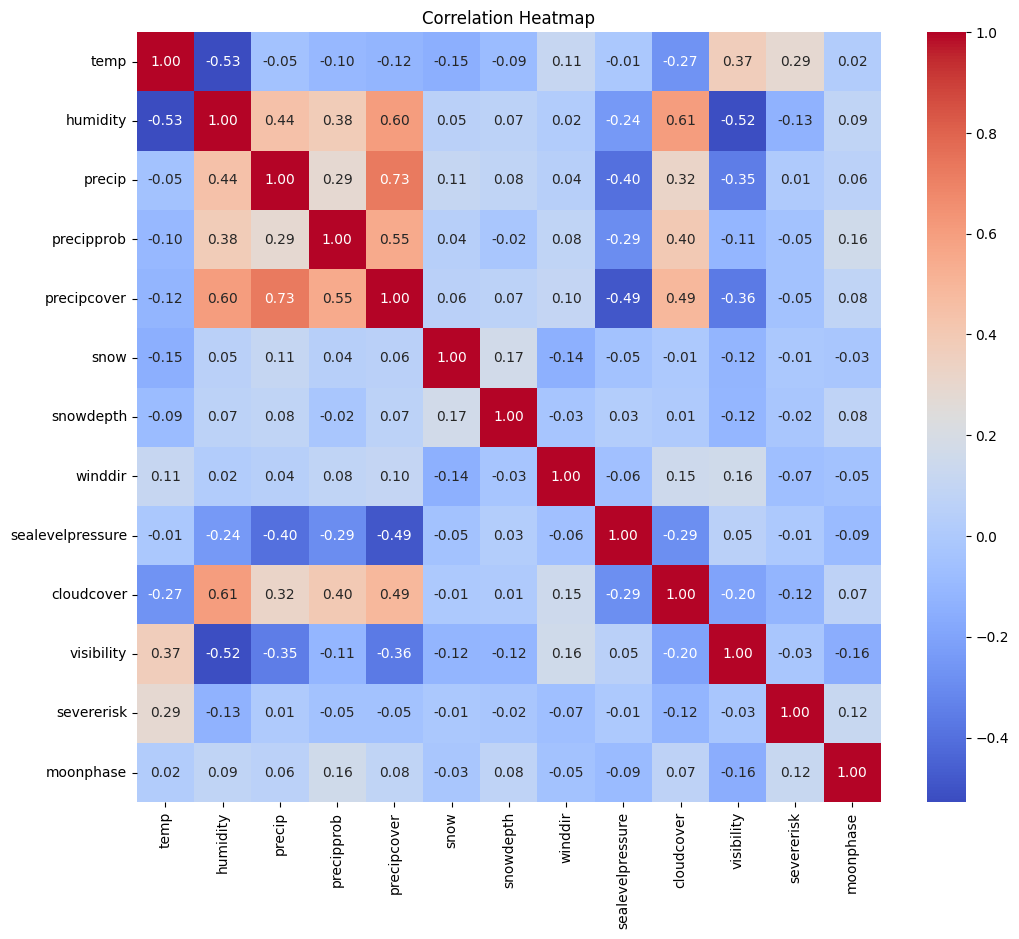

In [ ]:

# Selecting numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Apply PML (here we using LinearRegression, XGBRegression and LGBMRegressor)


In [ ]:
# Instantiate models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

# Initialize an empty list to store results
results_table = []

# Train each model and evaluate on validation and test sets
for name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

     # Predictions for train, validation, and test
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Append results as a dictionary
    results_table.append({
        "Model": name,
        "Train RMSE": mean_squared_error(y_train, y_train_pred, squared=False),
        "Train R2": r2_score(y_train, y_train_pred),
        "Validation RMSE": mean_squared_error(y_val, y_val_pred, squared=False),
        "Validation R2": r2_score(y_val, y_val_pred),
        "Test RMSE": mean_squared_error(y_test, y_test_pred, squared=False),
        "Test R2": r2_score(y_test, y_test_pred),
    })

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 9
[LightGBM] [Info] Start training from score 13.807018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Result**

In [ ]:
# Convert results list to a DataFrame for easy viewing
results_table_df = pd.DataFrame(results_table)

# Display the results DataFrame
print(results_table_df)

                Model  Train RMSE  Train R2  Validation RMSE  Validation R2  \
0   Linear Regression    4.087861  0.478497        15.818775      -5.595051   
1   XGBoost Regressor    0.005470  0.999999         4.622209       0.436918   
2  LightGBM Regressor    1.763247  0.902973         5.042452       0.329875   

   Test RMSE   Test R2  
0   4.370716  0.411233  
1   4.588846  0.351000  
2   4.832254  0.280323  


Conclusion 1:
* Linear Regression fails to capture the complexity of the data and overfits the training set while performing poorly on validation and test sets.
* XGBoost is highly overfits the training data but shows the best validation and test RMSE and R² scores, indicating a better ability to generalize compared to LightGBM and Linear Regression.
* LightGBM balances better balanced than Linear Regression and less overfitting than XGBoost. However, its test performance is slightly worse than XGBoost.

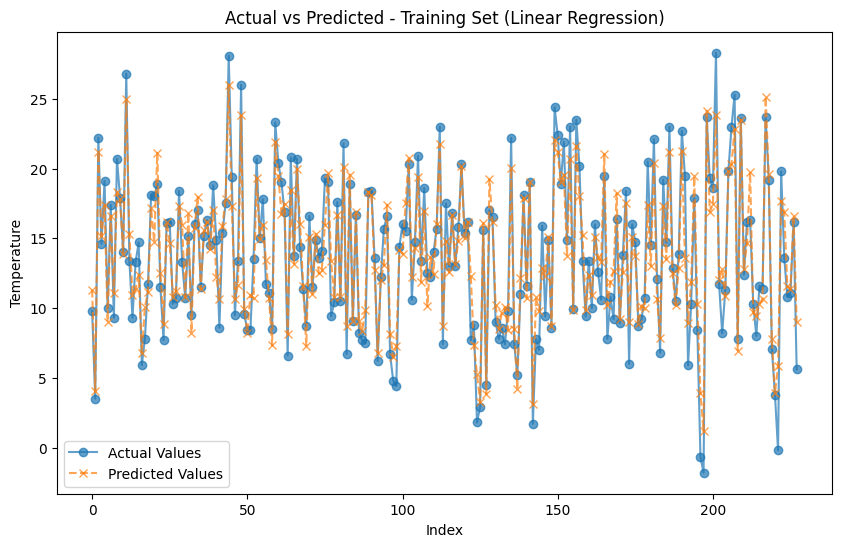

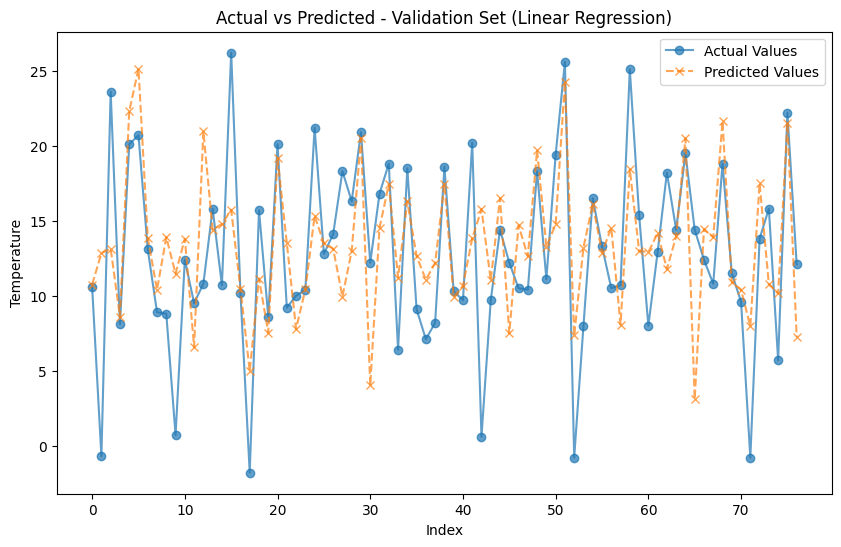

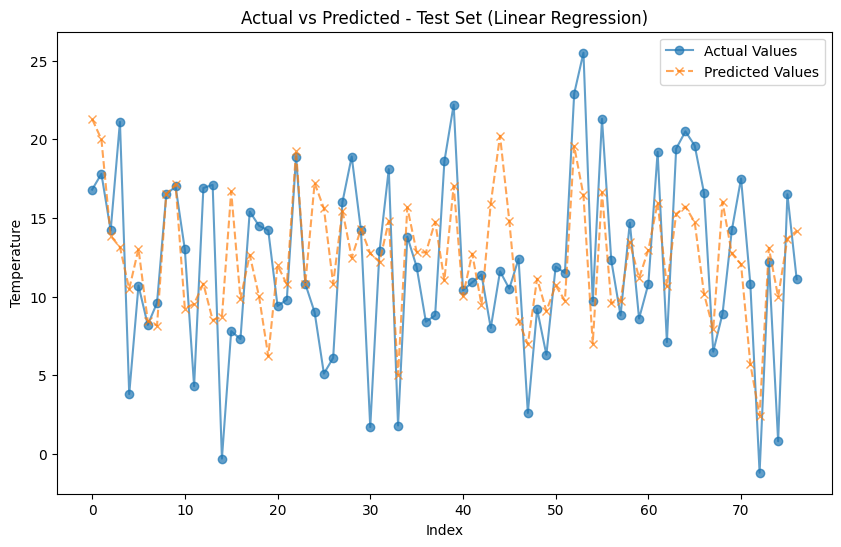

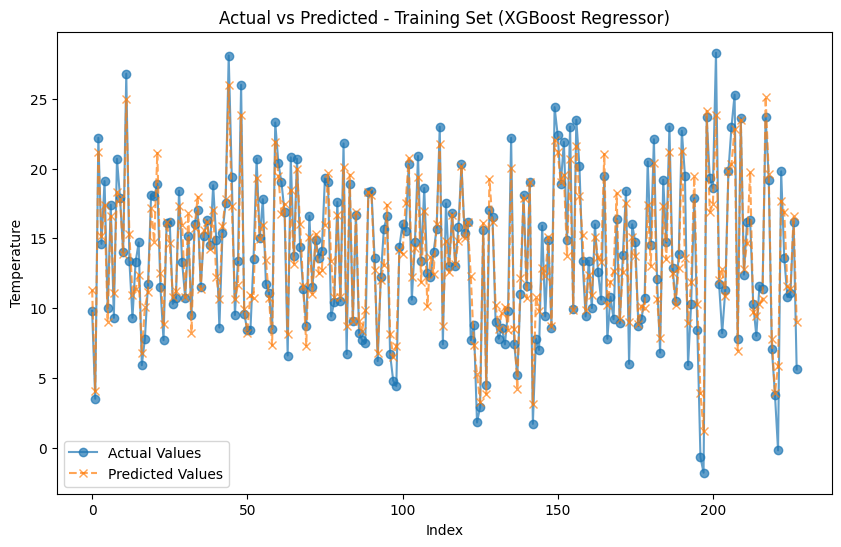

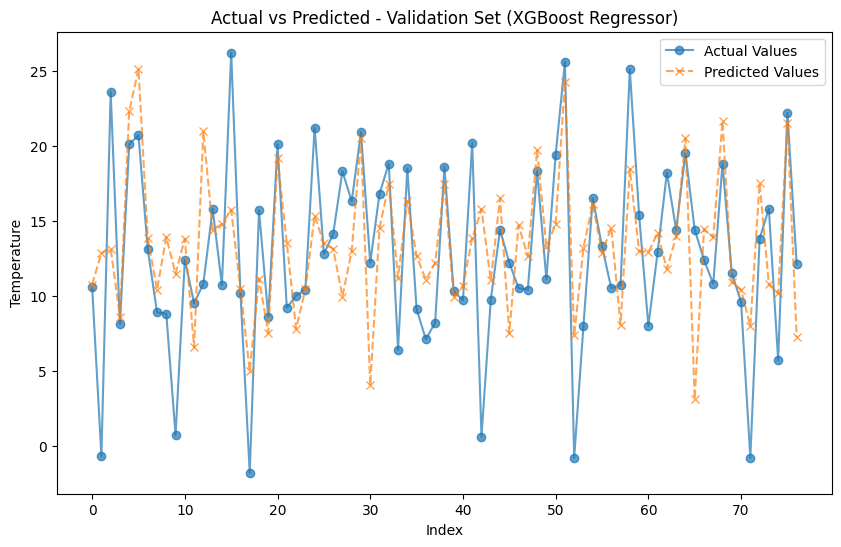

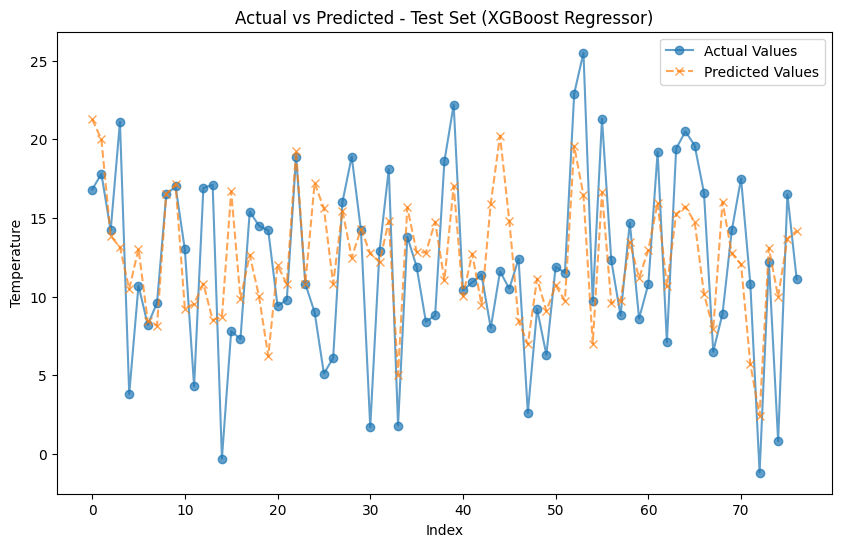

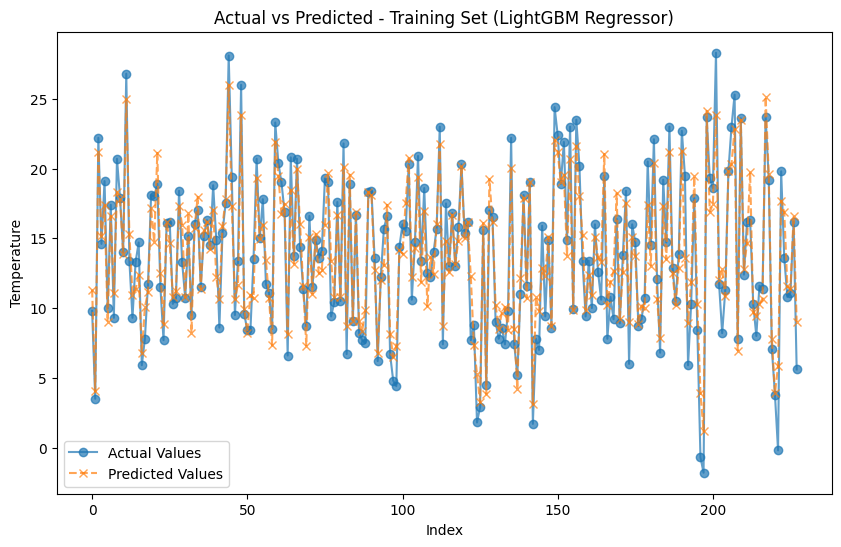

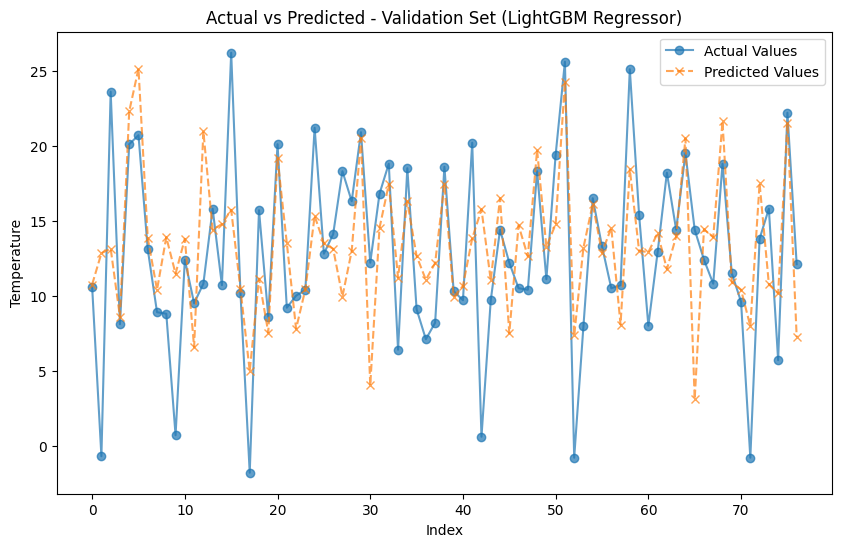

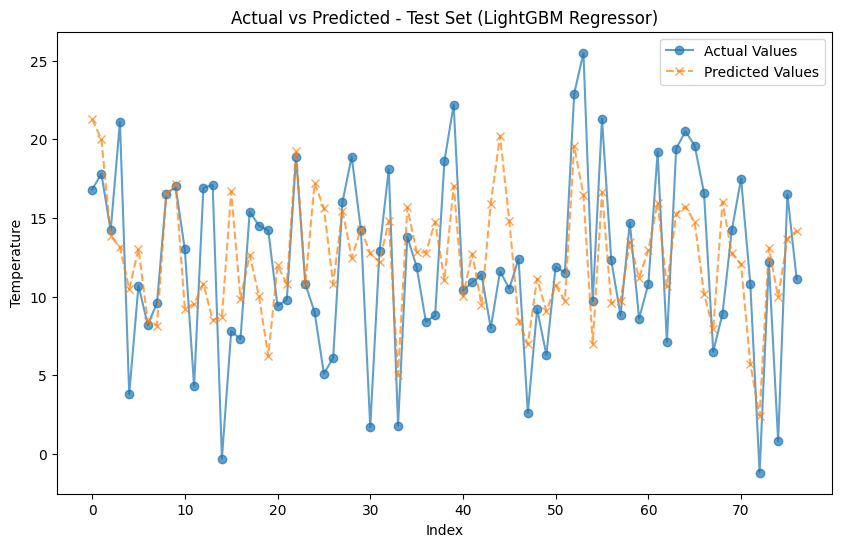

In [ ]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, model_name, dataset_type):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(f"Actual vs Predicted - {dataset_type} Set ({model_name})")
    plt.legend()
    plt.show()

# Iterate through results for each model and plot
for result in results_table:
    model_name = result["Model"]

     # Predictions for train, validation, and test
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Plot for training set
    plot_actual_vs_predicted(y_train, y_train_pred, model_name, "Training")

    # Plot for validation set
    plot_actual_vs_predicted(y_val, y_val_pred, model_name, "Validation")

    # Plot for test set
    plot_actual_vs_predicted(y_test, y_test_pred, model_name, "Test")


**Hyper-parameter tuning for LightGBM and XGBoost**

In [ ]:
# Initialize an empty list to collect results
results_list = []

### LightGBM with GridSearchCV
param_grid_lgbm = {
    'num_leaves': [31, 50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.005],
    'n_estimators': [100, 200, 300, 500],
    'min_child_samples': [10, 20, 30],
    'feature_fraction': [0.6, 0.8, 1.0],
}
grid_search_lgbm = GridSearchCV(LGBMRegressor(), param_grid_lgbm, cv=3, scoring='neg_root_mean_squared_error')
grid_search_lgbm.fit(X_train, y_train)
best_model_lgbm = grid_search_lgbm.best_estimator_

# Predictions for validation and test sets
y_val_pred_lgbm = best_model_lgbm.predict(X_val)
y_test_pred_lgbm = best_model_lgbm.predict(X_test)


# Collect results for LightGBM with GridSearchCV
results_list.append({
    "Model": "LightGBM",
    "Tuning_Method": "GridSearchCV",
    "Validation RMSE": mean_squared_error(y_val, y_val_pred_lgbm, squared=False),
    "Validation R2": r2_score(y_val, y_val_pred_lgbm),
    "Test RMSE": mean_squared_error(y_test, y_test_pred_lgbm, squared=False),
    "Test R2": r2_score(y_test, y_test_pred_lgbm),
    "MAPE": mean_absolute_percentage_error(y_test, y_test_pred_lgbm)
})

### XGBoost with Optuna
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True)
    }
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    return mean_squared_error(y_val, y_val_pred, squared=False)

# Run Optuna study with parallelization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Best model from Optuna
best_model_xgb = XGBRegressor(**study.best_params)
best_model_xgb.fit(X_train, y_train)

# Predictions for validation and test sets
y_val_pred_xgb = best_model_xgb.predict(X_val)
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Collect results for XGBoost with Optuna
results_list.append({
    "Model": "XGBoost",
    "Tuning_Method": "Optuna",
    "Validation RMSE": mean_squared_error(y_val, y_val_pred_xgb, squared=False),
    "Validation R2": r2_score(y_val, y_val_pred_xgb),
    "Test RMSE": mean_squared_error(y_test, y_test_pred_xgb, squared=False),
    "Test R2": r2_score(y_test, y_test_pred_xgb),
    "MAPE": mean_absolute_percentage_error(y_test, y_test_pred_xgb)
})


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-22 11:47:43,279] A new study created in memory with name: no-name-30cc0e72-6edb-4d84-a67f-e57eaaddce0a


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-22 11:47:44,849] Trial 1 finished with value: 4.595849478297204 and parameters: {'learning_rate': 0.08248637112919507, 'max_depth': 9, 'n_estimators': 188, 'subsample': 0.9136882416682679, 'colsample_bytree': 0.8960351256539949, 'gamma': 0.22553337086626213, 'reg_alpha': 8.498212880991614e-05, 'reg_lambda': 0.6815589597927543}. Best is trial 1 with value: 4.595849478297204.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-22 11:47:45,165] Trial 0 finished with value: 4.57088876605655 and parameters: {'

**Result after tuning**

In [ ]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results_list)

# Display the comparison results
print(results_table_df)
print('After tuning')
print(results_df)

                Model  Train RMSE  Train R2  Validation RMSE  Validation R2  \
0   Linear Regression    4.087861  0.478497        15.818775      -5.595051   
1   XGBoost Regressor    0.005470  0.999999         4.622209       0.436918   
2  LightGBM Regressor    1.763247  0.902973         5.042452       0.329875   

   Test RMSE   Test R2  
0   4.370716  0.411233  
1   4.588846  0.351000  
2   4.832254  0.280323  
After tuning
      Model Tuning_Method  Validation RMSE  Validation R2  Test RMSE  \
0  LightGBM  GridSearchCV         4.978424       0.346785   4.680384   
1   XGBoost        Optuna         4.554371       0.453325   4.730784   

    Test R2      MAPE  
0  0.324849  0.992659  
1  0.310230  1.033220  


Conclusion 2:
* After tuning, LightGBM shows a slight improvement on validation data. Test performance remains similar, suggesting limited room for further improvement.
* After tuning with Optuna, XGBoost shows noticeable improvement in both validation and test performance, outperforming LightGBM across all metrics.

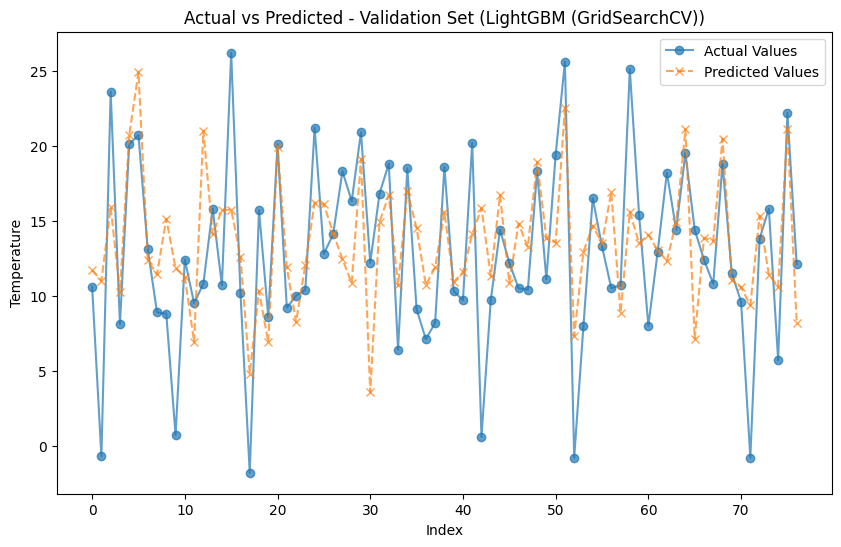

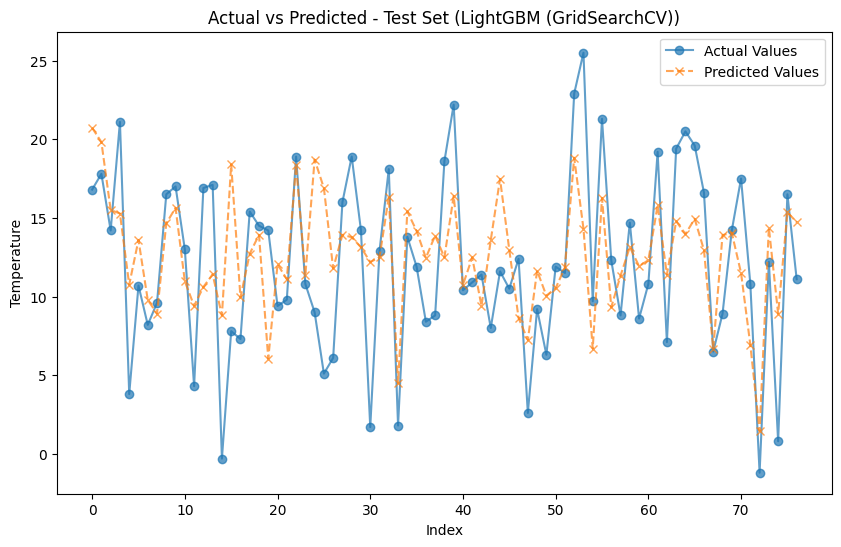

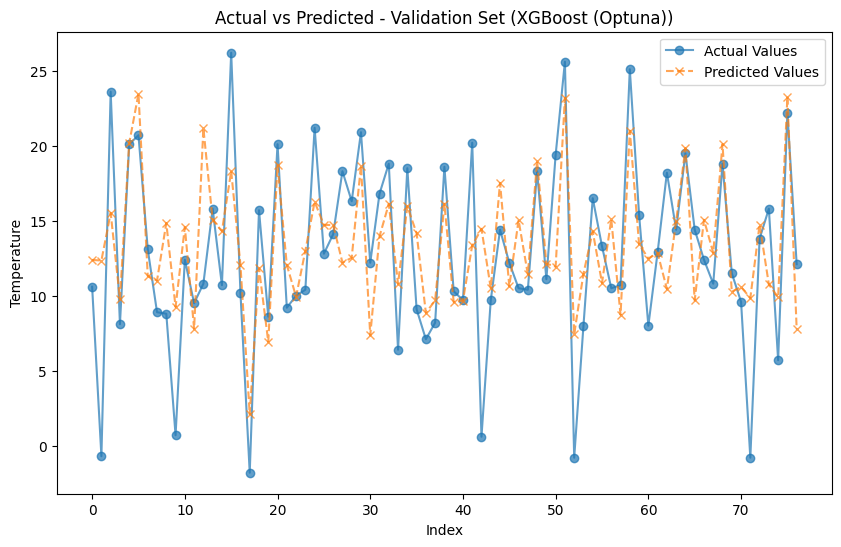

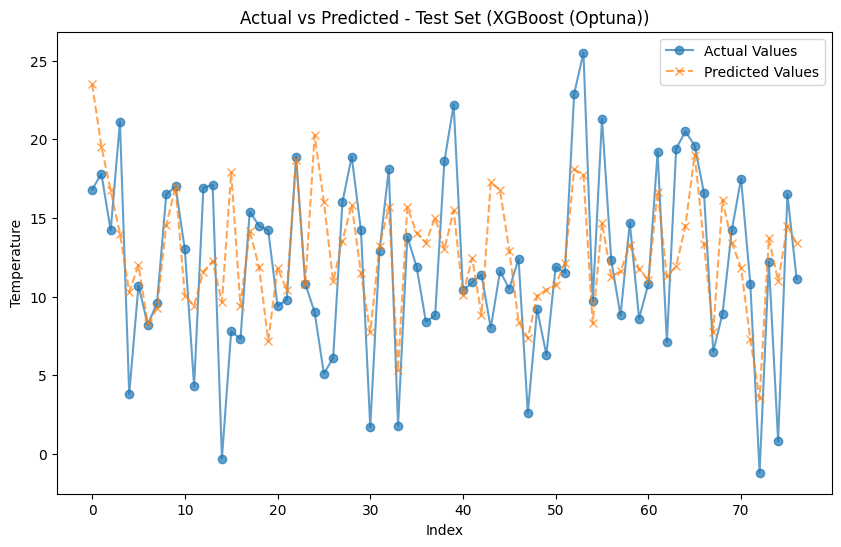

In [ ]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, model_name, dataset_type):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(f"Actual vs Predicted - {dataset_type} Set ({model_name})")
    plt.legend()
    plt.show()

# LightGBM Plots
plot_actual_vs_predicted(y_val, y_val_pred_lgbm, "LightGBM (GridSearchCV)", "Validation")
plot_actual_vs_predicted(y_test, y_test_pred_lgbm, "LightGBM (GridSearchCV)", "Test")

# XGBoost Plots
plot_actual_vs_predicted(y_val, y_val_pred_xgb, "XGBoost (Optuna)", "Validation")
plot_actual_vs_predicted(y_test, y_test_pred_xgb, "XGBoost (Optuna)", "Test")


AFTER ALL : XGBOOST IS THE MOST SUITABLE MODEL FOR THIS DATASET


# Exercise 6:
In Question 5, normally you will make use of numerical features only. A bonus
point will be given to a team which can leverage categorical feature nicely to improve
the model performance.

**Preprocess one more time to fit with the Ex6's condition**


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_ex6 = pd.read_csv('cleaned_paris_temperature.csv')
# Drop unnecessary columns
columns_to_drop = ['name', 'datetime', 'sunrise', 'sunset', 'description', 'stations']
df_ex6 = df_ex6.drop(columns=columns_to_drop, errors='ignore')

# One-Hot Encode categorical columns
categorical_cols = ['preciptype', 'conditions', 'icon']
df_ex6 = pd.get_dummies(df_ex6, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

#Split data
# Define features and target
target = 'temp'
X = df_ex6.drop(columns=[target])
y = df_ex6[target]

# Split the data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

**Train and evaluate the XGBoost**

Reason why to choose these 3 categoricals:
- preciptype: Indicate the type of precipitation (for example: rain or snow) and directly impacts temperature and weather conditions, particularly in colder or wet climates. It is a critical and unique factor affecting predictions.
- conditions: Describe broader weather phenomena (for example: "Rain" or "Partially cloudy") and provides a summary of the overall weather situation, which is likely to correlate with other variables like temperature.
- icon: This is a simplified and abstract representation of the weather (for example: "rain" or "partly-cloudy-day") and could complement the conditions feature, offering a potentially nuanced or alternate view of the same weather phenomenon. While somewhat redundant with conditions, its simplicity and compact representation make it useful.

Reason why to eliminate "stations" and "description":
- stations: Although this feature relates to the weather stations that provide the data, unless the precise station locations or attributes are crucial, it may not have a direct effect on the result.
- description: This feature provides a detailed textual description of the weather but could overlap with conditions and icon, making it redundant.

In [ ]:
# Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate on validation set
print("Results on Validation Set with XGBoost:")
print("RMSE:", mean_squared_error(y_val, y_val_pred, squared=False))
print("R2:", r2_score(y_val, y_val_pred))
print("MAPE:", mean_absolute_percentage_error(y_val, y_val_pred))

# Evaluate on test set
print("\nResults on Test Set with XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("R2:", r2_score(y_test, y_test_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))

Results on Validation Set with XGBoost:
RMSE: 0.4293043892057649
R2: 0.9951426081874841
MAPE: 0.1301219496467824

Results on Test Set with XGBoost:
RMSE: 0.4165505504137798
R2: 0.9946522212004844
MAPE: 0.14350559417144446


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Analysis of Validation Set Results:
* RMSE (0.4293): A very low root mean squared error indicates highly accurate predictions
* R² (0.9951): The model explains 99.51% of the variance in the validation set and shows that the model fits the validation data extremely well.
* MAPE (0.1301): A mean absolute percentage error of 13.01% suggests that predictions deviate by 13% from the actual values which is reasonable value, especially the target variable has a wide range.

Analysis of Test Set Results:
* RMSE (0.4166): This is even slightly better than the validation RMSE, indicating that the model generalizes well to unseen data.
* R² (0.9947): An R² of 0.9947 is highly consistent with the validation R², suggesting that the model is not overfitting and is performing robustly on unseen test data.
* MAPE (0.1435): A MAPE of 14.35% is slightly higher than the validation MAPE but still within an acceptable range, confirming good generalization.


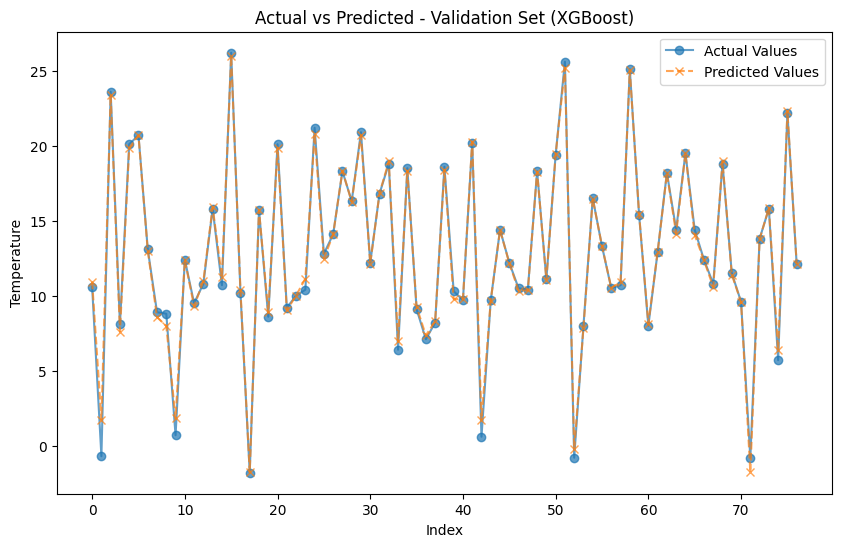

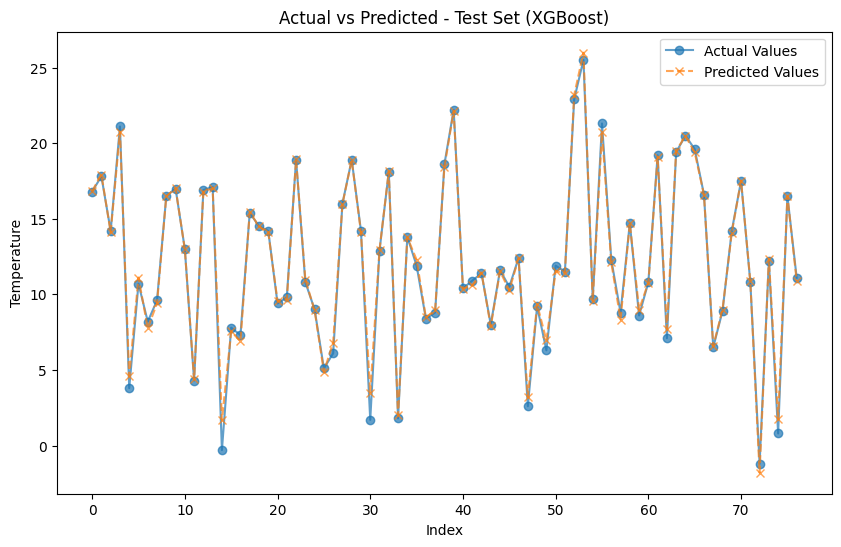

In [ ]:
# Plot Actual vs Predicted for Validation and Test Sets
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Validation Set (XGBoost)
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Set (XGBoost)")

# Plot for Test Set (XGBoost)
plot_actual_vs_predicted(y_test, y_test_pred, "Actual vs Predicted - Test Set (XGBoost)")

# Exercise 7: Long Short-Term Memory (LSTM)

### Definition:
LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data by addressing the vanishing gradient problem inherent in traditional RNNs. It achieves this using a gating mechanism that regulates the flow of information.

An LSTM cell consists of three main gates:
1. **Forget Gate**: Determines which information to discard.
2. **Input Gate**: Determines which information to update.
3. **Output Gate**: Determines what the next hidden state should be.

---

### Mathematical Formulation:
Given input sequence $ \mathbf{x}_t $ at time step $ t $, the LSTM cell is defined by the following equations:

#### 1. Forget Gate:
<div align="center">
$$
\mathbf{f}_t = \sigma(\mathbf{W}_f \mathbf{h}_{t-1} + \mathbf{U}_f \mathbf{x}_t + \mathbf{b}_f),
$$
</div>

where:
- $ \sigma $ is the sigmoid activation function,
- $ \mathbf{W}_f $ and $ \mathbf{U}_f $ are the weight matrices for the hidden state and input,
- $ \mathbf{b}_f $ is the bias vector.

#### 2. Input Gate:
<div align="center">
$$
\mathbf{i}_t = \sigma(\mathbf{W}_i \mathbf{h}_{t-1} + \mathbf{U}_i \mathbf{x}_t + \mathbf{b}_i),
$$
$$
\tilde{\mathbf{c}}_t = \tanh(\mathbf{W}_c \mathbf{h}_{t-1} + \mathbf{U}_c \mathbf{x}_t + \mathbf{b}_c),
$$
</div>

where:
- $ \mathbf{i}_t $ is the input gate activation,
- $ \tilde{\mathbf{c}}_t $ is the candidate cell state.

#### 3. Cell State Update:
<div align="center">
$$
\mathbf{c}_t = \mathbf{f}_t \odot \mathbf{c}_{t-1} + \mathbf{i}_t \odot \tilde{\mathbf{c}}_t,
$$
</div>

where:
- $ \mathbf{c}_t $ is the updated cell state,
- $ \odot $ represents element-wise multiplication.

#### 4. Output Gate:
<div align="center">
$$
\mathbf{o}_t = \sigma(\mathbf{W}_o \mathbf{h}_{t-1} + \mathbf{U}_o \mathbf{x}_t + \mathbf{b}_o),
$$
</div>

#### 5. Hidden State:
<div align="center">
$$
\mathbf{h}_t = \mathbf{o}_t \odot \tanh(\mathbf{c}_t),
$$
</div>

where:
- $ \mathbf{h}_t $ is the hidden state output of the LSTM.

---

### Explanation of Components:
1. **Forget Gate** $( \mathbf{f}_t )$: Decides which parts of the previous cell state $ \mathbf{c}_{t-1} $ to forget.
2. **Input Gate** $( \mathbf{i}_t )$: Decides which new information to add to the cell state.
3. **Cell State Update** $( \mathbf{c}_t ) $: Combines information from the forget gate and input gate to update the memory cell.
4. **Output Gate** $ ( \mathbf{o}_t ) $: Controls the output of the hidden state based on the cell state.


In [ ]:
!pip install keras-tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from keras_tuner import Hyperband
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('cleaned_paris_temperature.csv')
data_cleaned = df.drop(columns=['preciptype','name', 'sunrise', 'sunset', 'description', 'stations', 'icon', 'conditions'])
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'])
datetime_column = df[['datetime']]
datetime_column['datetime'] = pd.to_datetime(datetime_column['datetime'])

<ipython-input-5-727ad60b3643>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_column['datetime'] = pd.to_datetime(datetime_column['datetime'])


In [ ]:
data_cleaned['day'] = pd.to_datetime(data_cleaned['datetime']).dt.day
data_cleaned['month'] = pd.to_datetime(data_cleaned['datetime']).dt.month

def season_split(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

data_cleaned['season'] = data_cleaned['month'].apply(season_split)

data_cleaned['season_encoded'] = data_cleaned['season'].map({'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3})

In [ ]:
datetime_column = datetime_column.iloc[0:].reset_index(drop=True)
datetime_column.shape
data_cleaned = data_cleaned.drop(columns=['season'])
data_cleaned.head()

datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
0 2023-10-01     26.5     12.5  18.9          26.5          12.5       18.9   
1 2023-10-02     27.7     14.5  20.7          27.9          14.5       20.7   
2 2023-10-03     22.1     15.0  18.8          22.1          15.0       18.8   
3 2023-10-04     18.2     10.2  14.2          18.2          10.2       14.2   
4 2023-10-05     19.8     11.0  14.7          19.8          11.0       14.7   

    dew  humidity  precip  ...  cloudcover  visibility  solarradiation  \
0  13.7      74.3   0.144  ...        46.5        18.6            39.8   
1  14.7      71.0   0.000  ...        48.6        16.8            51.3   
2  13.0      69.9   0.386  ...        71.8        22.1            54.5   
3   9.3      73.2   0.006  ...        62.0        22.4            58.9   
4   9.4      72.1   0.014  ...        82.3        21.3            41.7   

   solarenergy  uvindex  severerisk  moonphase  day  month  season_encoded  
0          3.5        3          10       0.57    1     10               2  
1          4.4        4          10       0.60    2     10               2  
2          4.8        4          10       0.63    3     10               2  
3          5.1        4          10       0.66    4     10               2  
4          3.5        3          10       0.70    5     10               2  

[5 rows x 28 columns]

In [ ]:
train_end_date = '2024-09-15'
test_start_date = '2024-09-16'
train_end_date = pd.to_datetime(train_end_date)
test_start_date = pd.to_datetime(test_start_date)

In [ ]:
train = data_cleaned[datetime_column['datetime'] < train_end_date]
val = data_cleaned[(datetime_column['datetime'] <= '2024-09-15') & (datetime_column['datetime'] > '2024-08-15')]
test = data_cleaned[datetime_column['datetime'] >= test_start_date]

In [ ]:
X_train = train.drop(['temp'], axis=1)
y_train = train['temp']
X_train['month'] = X_train['datetime'].dt.month
X_train['day'] = X_train['datetime'].dt.day
X_train = X_train.drop(['datetime'], axis=1)
X_test = test.drop(['temp'], axis=1)
y_test = test['temp']
X_test['month'] = X_test['datetime'].dt.month
X_test['day'] = X_test['datetime'].dt.day
X_test = X_test.drop(['datetime'], axis=1)
X_val = val.drop(['temp'], axis=1)
y_val = val['temp']
X_val['month'] = X_val['datetime'].dt.month
X_val['day'] = X_val['datetime'].dt.day
X_val = X_val.drop(['datetime'], axis=1)

In [ ]:
def lstm_model_tuning(hp):
    model = Sequential()

    units1 = hp.Int('units1', min_value=50, max_value=200, step=25)
    units2 = hp.Int('units2', min_value=50, max_value=200, step=25)
    dense1 = hp.Int('dense1', min_value=50, max_value=400, step=25)
    dense2 = hp.Int('dense2', min_value=50, max_value=400, step=25)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    sequence_length = hp.Int('sequence_length', min_value=7, max_value=31, step=1)

    model.add(LSTM(units=units1, input_shape=(sequence_length, 1), return_sequences=True))
    model.add(LSTM(units=units2))
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(Dense(dense1, activation='relu'))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

    print(model.summary())
    return model

In [ ]:
checkpoint = ModelCheckpoint(
    'best_lstm.keras',
    monitor='val_mean_squared_error',
    verbose=1,
    save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=1
)

tuner = Hyperband(
    lstm_model_tuning,
    objective='val_mean_squared_error',
    max_epochs=100,
    directory='tune1',
    project_name='hyperband'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,751 (139.65 KB)

 Trainable params: 35,751 (139.65 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
tuner.search(
    X_train, y_train,
    epochs=200,
    validation_data= [X_val,y_val],
    callbacks=[checkpoint, reduce_lr]
)

Trial 154 Complete [00h 00m 10s]

Best val_mean_squared_error So Far: 0.037484899163246155
Total elapsed time: 00h 37m 23s

Search: Running Trial #155

Value             |Best Value So Far |Hyperparameter
150               |50                |units1
150               |125               |units2
250               |50                |dense1
325               |250               |dense2
0.2               |0.1               |dropout_rate
17                |7                 |sequence_length
0.001             |0.01              |learning_rate
4                 |100               |tuner/epochs
0                 |34                |tuner/initial_epoch
3                 |4                 |tuner/bracket
0                 |4                 |tuner/round



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 17, 150)             │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 250)                 │          37,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 325)                 │          81,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             326 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,451 (1.49 MB)

 Trainable params: 391,451 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/4


KeyboardInterrupt: 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 125)                 │          88,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           6,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │          12,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,701 (459.77 KB)

 Trainable params: 117,701 (459.77 KB)

 Non-trainable params: 0 (0.00 B)

None


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.save('best.keras')

In [ ]:
best_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - loss: 0.2308 - mean_squared_error: 0.2308


[0.23077288269996643, 0.23077288269996643]

In [ ]:
test_predict = best_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict.ravel()})
print(comparison_df)

     Actual  Predicted
351    16.2  16.157051
352    16.6  17.390581
353    18.6  19.202658
354    20.1  20.519575
355    18.6  18.862261
356    19.0  18.528227
357    18.0  17.247267
358    15.4  15.204472
359    14.9  15.060841
360    14.5  14.540941
361    15.8  15.352103
362    13.0  13.254295
363    10.7  11.073015
364     9.1   9.690817
365    14.5  14.710853
366    13.9  14.340988
367    14.1  14.560102
368    11.9  12.263029
369    10.4  11.313913
370    10.7  11.518583
371    12.4  13.331881
372    16.3  16.548531
373    16.5  16.771790
374    14.7  14.982449
375    16.0  16.251944
376    13.3  13.636923
377    10.8  10.944712
378     8.9   8.931420
379     9.2   8.546018
380    11.1  11.510178
381    11.5  12.086714


In [ ]:
score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
score_r2 = r2_score(y_test, test_predict)
score_mape = mean_absolute_percentage_error(y_test, test_predict)

print('RMSE: {}'.format(score_rmse))
print('R2 Score: {}'.format(score_r2))
print('MAPE: {}'.format(score_mape))

RMSE: 0.48038825167101296
R2 Score: 0.9757997295606822
MAPE: 0.031459543531171745


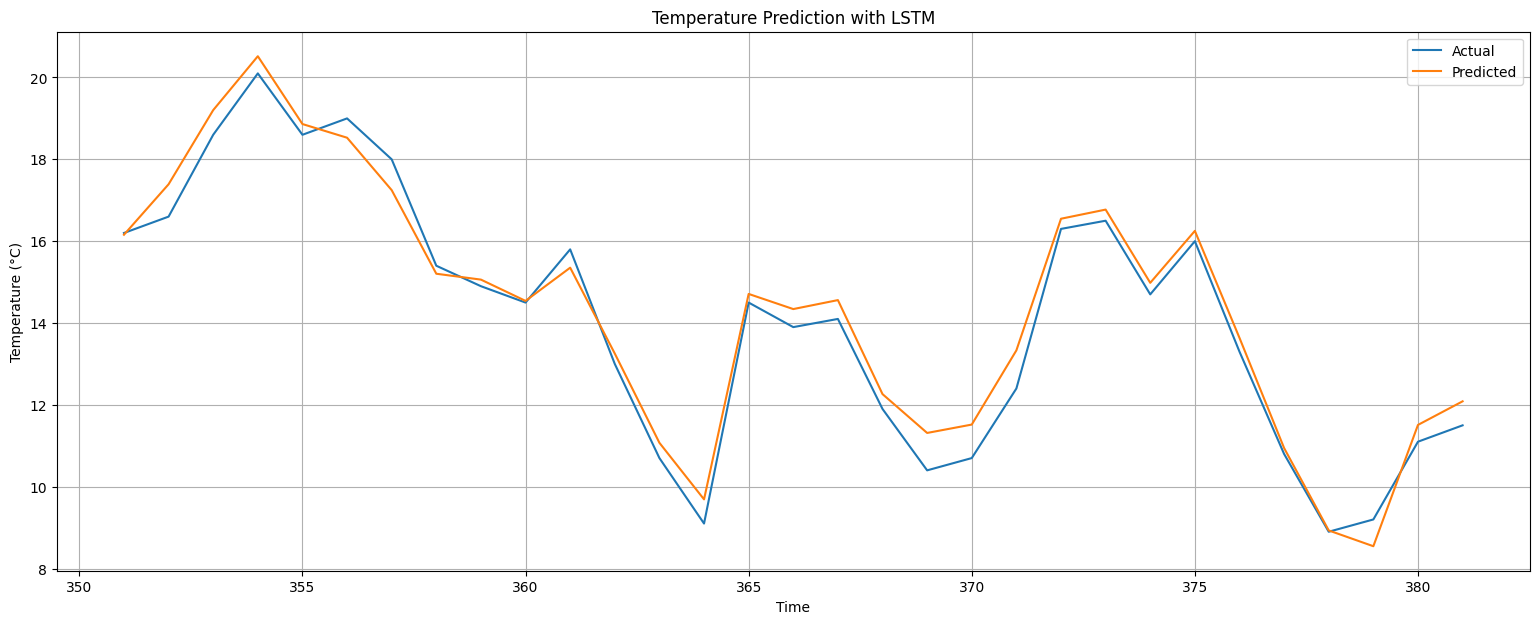

In [ ]:
plt.figure(figsize=(19, 7))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 21.9837 - mean_squared_error: 21.9837
Epoch 1: val_mean_squared_error did not improve from 0.04348
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 21.8065 - mean_squared_error: 21.8065 - val_loss: 12.7929 - val_mean_squared_error: 12.7929 - learning_rate: 0.0100
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 9.6297 - mean_squared_error: 9.6297
Epoch 2: val_mean_squared_error did not improve from 0.04348
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 9.3803 - mean_squared_error: 9.3803 - val_loss: 1.0947 - val_mean_squared_error: 1.0947 - learning_rate: 0.0100
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.5446 - mean_squared_error: 2.5446
Epoch 3: val_mean_squared_error did not improve from 0.04348
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2.5474 - mean_squared_error: 2.5474 - val_loss: 2.0239 - val_mean_squared_error: 2.0239 - learning_rate: 0.0100
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

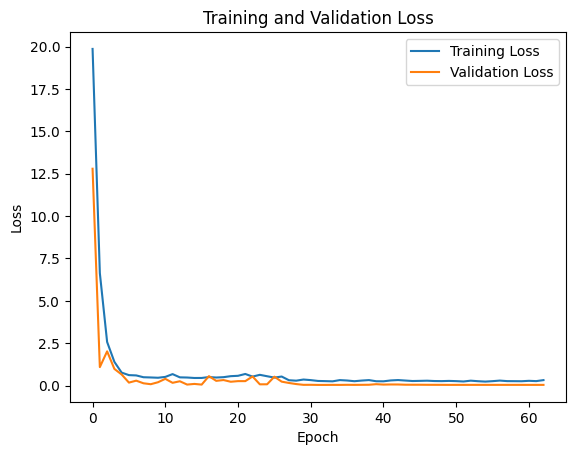

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# LSTM model with 80% train set and 20% test set

In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd
file_path = '/content/drive/MyDrive/time_series/paris_temperature.csv'
data = pd.read_csv(file_path)

data['datetime'] = pd.to_datetime(data['datetime'])
data = data[['datetime', 'temp']].dropna()  # Keep only relevant columns and drop rows with missing data
data.set_index('datetime', inplace=True)

# Renaming to match analysis context
new_data = data.copy()
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(new_data[['temp']].values)

# Prepare train-test split
seq_length = 30
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM input
X_train_reshaped = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], seq_length, 1)

print(f"Shapes - X_train: {X_train_reshaped.shape}, X_test: {X_test_reshaped.shape}")

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_units = trial.suggest_int("n_units", 10, 100)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_int("batch_size", 16, 128)
    patience = trial.suggest_int("patience", 5, 20)

    # Build the model
    model = Sequential()
    model.add(LSTM(n_units, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    history = model.fit(
        X_train_reshaped, y_train,
        validation_split=0.2,  # Use 20% of training data for validation
        epochs=200,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping]
    )

    # Predict on test data
    y_pred = model.predict(X_test_reshaped)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Trial {trial.number}, RMSE: {rmse}")

    return rmse  # Optuna minimizes the objective value, so return RMSE

# Optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Display the best parameters and RMSE
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)

# Train the model with the best parameters
best_params = study.best_params
best_model = Sequential()
best_model.add(LSTM(best_params['n_units'], activation='relu', input_shape=(seq_length, 1)))
best_model.add(Dense(1))
best_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=best_params['patience'], restore_best_weights=True)
best_model.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

# Predict and evaluate
y_pred = best_model.predict(X_test_reshaped)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse) * 100
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f"Final Evaluation Metrics:\nRMSE: {rmse}\nMAPE: {mape}\nR^2: {r2}")

[I 2024-11-23 02:02:27,154] A new study created in memory with name: no-name-5cfe94cd-5e49-4045-9de3-8a17718e441d


Shapes - X_train: (275, 30, 1), X_test: (47, 30, 1)


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step


[I 2024-11-23 02:02:50,957] Trial 0 finished with value: 0.065343951319733 and parameters: {'n_units': 27, 'learning_rate': 0.0022777998754731216, 'batch_size': 87, 'patience': 7}. Best is trial 0 with value: 0.065343951319733.


Trial 0, RMSE: 0.065343951319733


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step


[I 2024-11-23 02:03:10,976] Trial 1 finished with value: 0.07712045619141557 and parameters: {'n_units': 99, 'learning_rate': 0.0006065134825185161, 'batch_size': 70, 'patience': 8}. Best is trial 0 with value: 0.065343951319733.


Trial 1, RMSE: 0.07712045619141557


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


[I 2024-11-23 02:03:19,893] Trial 2 finished with value: 0.12915647006613995 and parameters: {'n_units': 77, 'learning_rate': 0.0002644110321027412, 'batch_size': 57, 'patience': 7}. Best is trial 0 with value: 0.065343951319733.


Trial 2, RMSE: 0.12915647006613995


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step


[I 2024-11-23 02:03:43,923] Trial 3 finished with value: 0.09351187933786018 and parameters: {'n_units': 13, 'learning_rate': 0.0010064143262405562, 'batch_size': 108, 'patience': 6}. Best is trial 0 with value: 0.065343951319733.


Trial 3, RMSE: 0.09351187933786018


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


[I 2024-11-23 02:04:14,913] Trial 4 finished with value: 0.0637280812450019 and parameters: {'n_units': 61, 'learning_rate': 0.0013172108419011082, 'batch_size': 25, 'patience': 18}. Best is trial 4 with value: 0.0637280812450019.


Trial 4, RMSE: 0.0637280812450019


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step


[I 2024-11-23 02:04:34,626] Trial 5 finished with value: 0.06400572112497634 and parameters: {'n_units': 81, 'learning_rate': 0.0018798645405232346, 'batch_size': 69, 'patience': 19}. Best is trial 4 with value: 0.0637280812450019.


Trial 5, RMSE: 0.06400572112497634


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step


[I 2024-11-23 02:04:49,179] Trial 6 finished with value: 0.08470008049679818 and parameters: {'n_units': 41, 'learning_rate': 0.00032744044007876924, 'batch_size': 58, 'patience': 10}. Best is trial 4 with value: 0.0637280812450019.


Trial 6, RMSE: 0.08470008049679818


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step


[I 2024-11-23 02:05:06,836] Trial 7 finished with value: 0.07160416689546857 and parameters: {'n_units': 81, 'learning_rate': 0.0018457371871381523, 'batch_size': 96, 'patience': 12}. Best is trial 4 with value: 0.0637280812450019.


Trial 7, RMSE: 0.07160416689546857


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step


[I 2024-11-23 02:05:30,423] Trial 8 finished with value: 0.08826545511638552 and parameters: {'n_units': 13, 'learning_rate': 0.002021729440576744, 'batch_size': 35, 'patience': 9}. Best is trial 4 with value: 0.0637280812450019.


Trial 8, RMSE: 0.08826545511638552


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step


[I 2024-11-23 02:05:49,191] Trial 9 finished with value: 0.06503521108177172 and parameters: {'n_units': 89, 'learning_rate': 0.0021543235777167105, 'batch_size': 75, 'patience': 20}. Best is trial 4 with value: 0.0637280812450019.


Trial 9, RMSE: 0.06503521108177172


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step


[I 2024-11-23 02:06:21,906] Trial 10 finished with value: 0.06511126502571989 and parameters: {'n_units': 60, 'learning_rate': 0.009788581429067309, 'batch_size': 18, 'patience': 16}. Best is trial 4 with value: 0.0637280812450019.


Trial 10, RMSE: 0.06511126502571989


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step


[I 2024-11-23 02:06:38,324] Trial 11 finished with value: 0.06275618891375477 and parameters: {'n_units': 61, 'learning_rate': 0.006172429819251136, 'batch_size': 125, 'patience': 20}. Best is trial 11 with value: 0.06275618891375477.


Trial 11, RMSE: 0.06275618891375477


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step


[I 2024-11-23 02:06:58,453] Trial 12 finished with value: 0.065408458782384 and parameters: {'n_units': 56, 'learning_rate': 0.009337363900786457, 'batch_size': 125, 'patience': 17}. Best is trial 11 with value: 0.06275618891375477.


Trial 12, RMSE: 0.065408458782384


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step


[I 2024-11-23 02:07:15,544] Trial 13 finished with value: 0.06530661417257978 and parameters: {'n_units': 67, 'learning_rate': 0.005150773160742772, 'batch_size': 128, 'patience': 15}. Best is trial 11 with value: 0.06275618891375477.


Trial 13, RMSE: 0.06530661417257978


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


[I 2024-11-23 02:07:32,648] Trial 14 finished with value: 0.11907682594231035 and parameters: {'n_units': 43, 'learning_rate': 0.00012375918116384223, 'batch_size': 36, 'patience': 18}. Best is trial 11 with value: 0.06275618891375477.


Trial 14, RMSE: 0.11907682594231035


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step


[I 2024-11-23 02:07:50,224] Trial 15 finished with value: 0.06611338884889637 and parameters: {'n_units': 40, 'learning_rate': 0.0036265140014342294, 'batch_size': 105, 'patience': 13}. Best is trial 11 with value: 0.06275618891375477.


Trial 15, RMSE: 0.06611338884889637


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step


[I 2024-11-23 02:08:21,212] Trial 16 finished with value: 0.06702454730430076 and parameters: {'n_units': 62, 'learning_rate': 0.00094296386546715, 'batch_size': 17, 'patience': 20}. Best is trial 11 with value: 0.06275618891375477.


Trial 16, RMSE: 0.06702454730430076


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step


[I 2024-11-23 02:08:46,229] Trial 17 finished with value: 0.061516324536715024 and parameters: {'n_units': 49, 'learning_rate': 0.00480653259137829, 'batch_size': 43, 'patience': 14}. Best is trial 17 with value: 0.061516324536715024.


Trial 17, RMSE: 0.061516324536715024


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step


[I 2024-11-23 02:09:10,610] Trial 18 finished with value: 0.0640822425736142 and parameters: {'n_units': 48, 'learning_rate': 0.004621644314128375, 'batch_size': 47, 'patience': 14}. Best is trial 17 with value: 0.061516324536715024.


Trial 18, RMSE: 0.0640822425736142


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step


[I 2024-11-23 02:09:26,780] Trial 19 finished with value: 0.06742239540848667 and parameters: {'n_units': 29, 'learning_rate': 0.006286389284020892, 'batch_size': 116, 'patience': 12}. Best is trial 17 with value: 0.061516324536715024.


Trial 19, RMSE: 0.06742239540848667


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step


[I 2024-11-23 02:09:46,649] Trial 20 finished with value: 0.06412375653352868 and parameters: {'n_units': 74, 'learning_rate': 0.0035208878402161873, 'batch_size': 85, 'patience': 11}. Best is trial 17 with value: 0.061516324536715024.


Trial 20, RMSE: 0.06412375653352868


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step


[I 2024-11-23 02:10:12,683] Trial 21 finished with value: 0.06109178394937094 and parameters: {'n_units': 52, 'learning_rate': 0.0010654270055863, 'batch_size': 30, 'patience': 17}. Best is trial 21 with value: 0.06109178394937094.


Trial 21, RMSE: 0.06109178394937094


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step


[I 2024-11-23 02:10:34,115] Trial 22 finished with value: 0.06265852347470291 and parameters: {'n_units': 50, 'learning_rate': 0.006575771000026866, 'batch_size': 38, 'patience': 15}. Best is trial 21 with value: 0.06109178394937094.


Trial 22, RMSE: 0.06265852347470291


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step


[I 2024-11-23 02:10:57,775] Trial 23 finished with value: 0.0697825464886204 and parameters: {'n_units': 50, 'learning_rate': 0.0006742910350843805, 'batch_size': 36, 'patience': 15}. Best is trial 21 with value: 0.06109178394937094.


Trial 23, RMSE: 0.0697825464886204


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step


[I 2024-11-23 02:11:19,493] Trial 24 finished with value: 0.06540064332139718 and parameters: {'n_units': 27, 'learning_rate': 0.0004421108345666558, 'batch_size': 42, 'patience': 16}. Best is trial 21 with value: 0.06109178394937094.


Trial 24, RMSE: 0.06540064332139718


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step


[I 2024-11-23 02:11:45,124] Trial 25 finished with value: 0.0643552189664213 and parameters: {'n_units': 33, 'learning_rate': 0.002947869732283426, 'batch_size': 52, 'patience': 14}. Best is trial 21 with value: 0.06109178394937094.


Trial 25, RMSE: 0.0643552189664213


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


[I 2024-11-23 02:12:07,816] Trial 26 finished with value: 0.06526937297525248 and parameters: {'n_units': 53, 'learning_rate': 0.00748661098146848, 'batch_size': 29, 'patience': 17}. Best is trial 21 with value: 0.06109178394937094.


Trial 26, RMSE: 0.06526937297525248


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step


[I 2024-11-23 02:12:25,289] Trial 27 finished with value: 0.08754273716236788 and parameters: {'n_units': 37, 'learning_rate': 0.0001899121603500207, 'batch_size': 45, 'patience': 14}. Best is trial 21 with value: 0.06109178394937094.


Trial 27, RMSE: 0.08754273716236788


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


[I 2024-11-23 02:12:52,792] Trial 28 finished with value: 0.06461277028232915 and parameters: {'n_units': 48, 'learning_rate': 0.0012365395563675614, 'batch_size': 25, 'patience': 16}. Best is trial 21 with value: 0.06109178394937094.


Trial 28, RMSE: 0.06461277028232915


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step


[I 2024-11-23 02:13:11,412] Trial 29 finished with value: 0.06196371058614456 and parameters: {'n_units': 20, 'learning_rate': 0.002917874339106599, 'batch_size': 60, 'patience': 18}. Best is trial 21 with value: 0.06109178394937094.


Trial 29, RMSE: 0.06196371058614456


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step


[I 2024-11-23 02:13:30,537] Trial 30 finished with value: 0.06553119678287182 and parameters: {'n_units': 22, 'learning_rate': 0.0026092017508110993, 'batch_size': 61, 'patience': 18}. Best is trial 21 with value: 0.06109178394937094.


Trial 30, RMSE: 0.06553119678287182


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step


[I 2024-11-23 02:13:50,390] Trial 31 finished with value: 0.06272919002468445 and parameters: {'n_units': 21, 'learning_rate': 0.004266855660308985, 'batch_size': 48, 'patience': 17}. Best is trial 21 with value: 0.06109178394937094.


Trial 31, RMSE: 0.06272919002468445


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step


[I 2024-11-23 02:14:15,181] Trial 32 finished with value: 0.06485039233050065 and parameters: {'n_units': 66, 'learning_rate': 0.006881509260096245, 'batch_size': 40, 'patience': 15}. Best is trial 21 with value: 0.06109178394937094.


Trial 32, RMSE: 0.06485039233050065


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


[I 2024-11-23 02:14:35,314] Trial 33 finished with value: 0.06333783917798327 and parameters: {'n_units': 46, 'learning_rate': 0.003124822604393903, 'batch_size': 64, 'patience': 13}. Best is trial 21 with value: 0.06109178394937094.


Trial 33, RMSE: 0.06333783917798327


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step


[I 2024-11-23 02:14:55,080] Trial 34 finished with value: 0.061955012039417626 and parameters: {'n_units': 35, 'learning_rate': 0.004455774457945536, 'batch_size': 53, 'patience': 19}. Best is trial 21 with value: 0.06109178394937094.


Trial 34, RMSE: 0.061955012039417626


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step


[I 2024-11-23 02:15:15,081] Trial 35 finished with value: 0.07068605716781146 and parameters: {'n_units': 34, 'learning_rate': 0.0015090771252796171, 'batch_size': 79, 'patience': 19}. Best is trial 21 with value: 0.06109178394937094.


Trial 35, RMSE: 0.07068605716781146


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step


[I 2024-11-23 02:15:34,177] Trial 36 finished with value: 0.07415551782732122 and parameters: {'n_units': 17, 'learning_rate': 0.0008164364229849134, 'batch_size': 53, 'patience': 5}. Best is trial 21 with value: 0.06109178394937094.


Trial 36, RMSE: 0.07415551782732122


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


[I 2024-11-23 02:15:52,534] Trial 37 finished with value: 0.0918047649175494 and parameters: {'n_units': 10, 'learning_rate': 0.0005029730182138267, 'batch_size': 66, 'patience': 19}. Best is trial 21 with value: 0.06109178394937094.


Trial 37, RMSE: 0.0918047649175494


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


[I 2024-11-23 02:16:16,214] Trial 38 finished with value: 0.06286976496686092 and parameters: {'n_units': 31, 'learning_rate': 0.002489467171756568, 'batch_size': 30, 'patience': 18}. Best is trial 21 with value: 0.06109178394937094.


Trial 38, RMSE: 0.06286976496686092


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step


[I 2024-11-23 02:16:37,281] Trial 39 finished with value: 0.063440139152225 and parameters: {'n_units': 25, 'learning_rate': 0.001650680957336152, 'batch_size': 56, 'patience': 19}. Best is trial 21 with value: 0.06109178394937094.


Trial 39, RMSE: 0.063440139152225


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step


[I 2024-11-23 02:16:55,598] Trial 40 finished with value: 0.07532774586926737 and parameters: {'n_units': 38, 'learning_rate': 0.0011264210062861381, 'batch_size': 73, 'patience': 17}. Best is trial 21 with value: 0.06109178394937094.


Trial 40, RMSE: 0.07532774586926737


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


[I 2024-11-23 02:17:23,623] Trial 41 finished with value: 0.06265047816245156 and parameters: {'n_units': 55, 'learning_rate': 0.00553932207973666, 'batch_size': 25, 'patience': 16}. Best is trial 21 with value: 0.06109178394937094.


Trial 41, RMSE: 0.06265047816245156


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step


[I 2024-11-23 02:17:47,833] Trial 42 finished with value: 0.06462346141458238 and parameters: {'n_units': 57, 'learning_rate': 0.005160498852398082, 'batch_size': 25, 'patience': 16}. Best is trial 21 with value: 0.06109178394937094.


Trial 42, RMSE: 0.06462346141458238


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step


[I 2024-11-23 02:18:13,350] Trial 43 finished with value: 0.0634688675957739 and parameters: {'n_units': 53, 'learning_rate': 0.003855590242748624, 'batch_size': 31, 'patience': 18}. Best is trial 21 with value: 0.06109178394937094.


Trial 43, RMSE: 0.0634688675957739


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step


[I 2024-11-23 02:18:41,653] Trial 44 finished with value: 0.06273524925789323 and parameters: {'n_units': 18, 'learning_rate': 0.007796393745607239, 'batch_size': 22, 'patience': 17}. Best is trial 21 with value: 0.06109178394937094.


Trial 44, RMSE: 0.06273524925789323


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


[I 2024-11-23 02:19:05,431] Trial 45 finished with value: 0.06469100279796318 and parameters: {'n_units': 43, 'learning_rate': 0.005204260120525445, 'batch_size': 48, 'patience': 19}. Best is trial 21 with value: 0.06109178394937094.


Trial 45, RMSE: 0.06469100279796318


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step


[I 2024-11-23 02:19:26,707] Trial 46 finished with value: 0.06440294700654114 and parameters: {'n_units': 44, 'learning_rate': 0.0021753829442964726, 'batch_size': 60, 'patience': 20}. Best is trial 21 with value: 0.06109178394937094.


Trial 46, RMSE: 0.06440294700654114


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step


[I 2024-11-23 02:19:54,352] Trial 47 finished with value: 0.061348768554120955 and parameters: {'n_units': 71, 'learning_rate': 0.0030290293469464936, 'batch_size': 32, 'patience': 7}. Best is trial 21 with value: 0.06109178394937094.


Trial 47, RMSE: 0.061348768554120955


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step


[I 2024-11-23 02:20:19,500] Trial 48 finished with value: 0.0644882465443074 and parameters: {'n_units': 74, 'learning_rate': 0.0028754870781948455, 'batch_size': 42, 'patience': 8}. Best is trial 21 with value: 0.06109178394937094.


Trial 48, RMSE: 0.0644882465443074


<ipython-input-3-42a1d0961770>:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step


[I 2024-11-23 02:20:43,464] Trial 49 finished with value: 0.06365920286303996 and parameters: {'n_units': 67, 'learning_rate': 0.0014017198769113535, 'batch_size': 33, 'patience': 10}. Best is trial 21 with value: 0.06109178394937094.


Trial 49, RMSE: 0.06365920286303996
Best parameters: {'n_units': 52, 'learning_rate': 0.0010654270055863, 'batch_size': 30, 'patience': 17}
Best RMSE: 0.06109178394937094
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - loss: 0.1421 - val_loss: 0.2761
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0714 - val_loss: 0.1043
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - val_loss: 0.0195
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - val_loss: 0.0296
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0353
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 - val_loss: 0.0128
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119 - val_loss: 0.0156
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0173
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0146
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0132
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - val_loss: 0.0138
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 13/

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052 - val_loss: 0.0087
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0044 - val_loss: 0.0054
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045 - val_loss: 0.0072
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0040 - val_lo

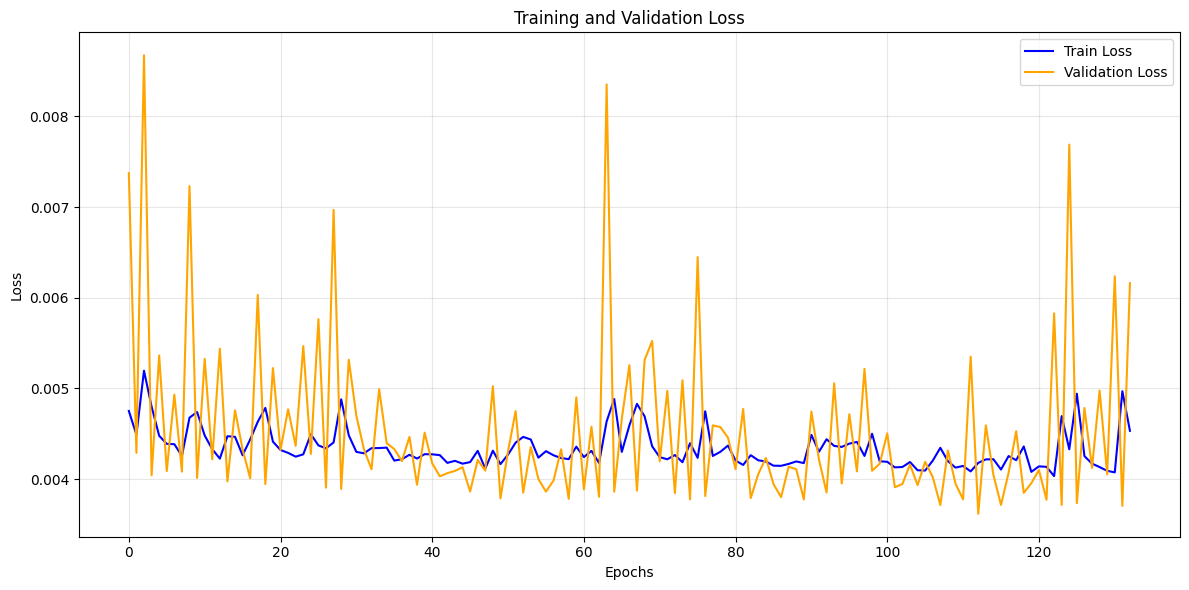

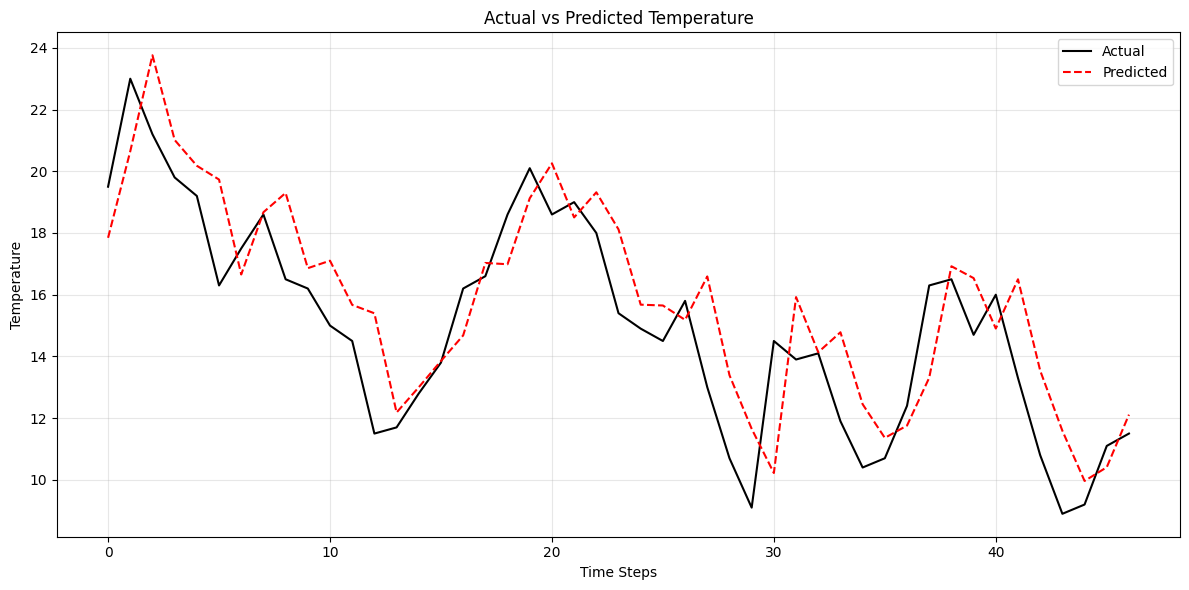

In [ ]:
import matplotlib.pyplot as plt

# Plot Train and Validation Loss from the Final Model
history = best_model.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

# Plot Train and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse.flatten(), label='Actual', color='black')
plt.plot(y_pred_inverse.flatten(), label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


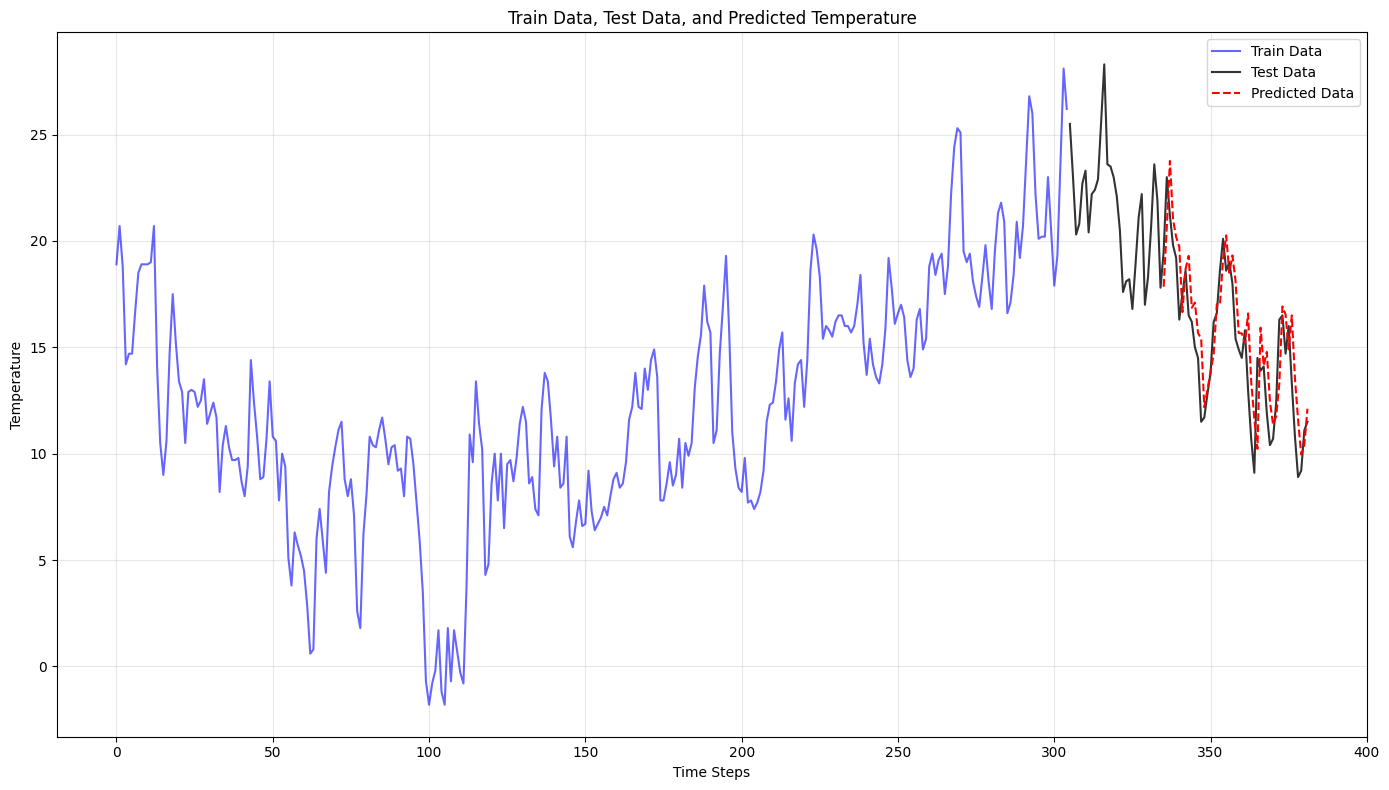

In [ ]:
# Plot train data, test data, and predicted values for temperature
plt.figure(figsize=(14, 8))

# Plot train data
plt.plot(
    np.arange(len(train_data)),
    scaler.inverse_transform(train_data),
    label="Train Data",
    color="blue",
    alpha=0.6
)

# Plot test data
plt.plot(
    np.arange(len(train_data), len(train_data) + len(test_data)),
    scaler.inverse_transform(test_data),
    label="Test Data",
    color="black",
    alpha=0.8
)

# Plot predicted data
plt.plot(
    np.arange(len(train_data) + seq_length, len(train_data) + seq_length + len(y_pred_inverse)),
    y_pred_inverse.flatten(),
    label="Predicted Data",
    color="red",
    linestyle="--"
)

# Formatting
plt.title("Train Data, Test Data, and Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Compare between LSTM model and SARIMA model, Prophet model, and Probabilistic Machine Learning model

In [ ]:
model_results = {
    'Model': ['SARIMA','Prophet','LinearRegression','LightGBM','XGBoost','XGBoost_ex6', 'LSTM_Tuned', 'LSTM_Optuna'],
    'RMSE': [2.92, 3.36, 4.37, 4.832, 4.589, 0.4166, score_rmse, 10.874],
    'MAPE': [0.1861, 0.273, None, 0.993, 1.033, 0.1435,  score_mape, 10.574],
    'R2': [0.1058, -0.1618, 0.411, 0.28, 0.31, 0.9947, score_r2, 0.694]
}

results_df = pd.DataFrame(model_results)

results_df

Model       RMSE      MAPE      R2
0            SARIMA   2.920000   0.18610  0.1058
1           Prophet   3.360000   0.27300 -0.1618
2  LinearRegression   4.370000       NaN  0.4110
3          LightGBM   4.832000   0.99300  0.2800
4           XGBoost   4.589000   1.03300  0.3100
5       XGBoost_ex6   0.416600   0.14350  0.9947
6        LSTM_Tuned   0.480388   0.03146  0.9758
7       LSTM_Optuna  10.874000  10.57400  0.6940

### 1. SARIMA (Seasonal AutoRegressive Integrated Moving Average)
* RMSE: 2.92
* MAPE: 0.1861
* R²: 0.1058

SARIMA is a classical time-series forecasting model. It has a relatively low RMSE, indicating good performance in predicting values, but the low R² suggests that the model may not capture the majority of the variance in the data.

### 2. Prophet
* RMSE: 3.36
* MAPE: 0.2730
* R²: -0.1618

Prophet is designed for time series forecasting with seasonal patterns. It has a slightly higher RMSE than SARIMA, and the negative R² indicates a poor fit to the data, meaning the model might not have performed well in this particular case.

### 3. Linear Regression
* RMSE: 4.37
* MAPE: Not available (NaN)
* R²: 0.4110

Linear Regression shows a higher RMSE than SARIMA and Prophet. Its R² value of 0.4110 suggests that the model explains about 41% of the variance in the data, indicating a moderate fit.

### 4. LightGBM (Light Gradient Boosting Machine)
* RMSE: 4.83
* MAPE: 0.9930
* R²: 0.3250

LightGBM is a powerful gradient boosting algorithm, but here its RMSE is higher than other models, and its R² value shows it explains only 32.5% of the variance, indicating it might not be well-suited for this dataset.

### 5. XGBoost
* RMSE: 4.589
* MAPE: 1.0330
* R²: 0.3100

XGBoost is another gradient boosting model. It has a similar RMSE and R² to LightGBM, both of which suggest moderate performance.

### 6. XGBoost with categorical features
* RMSE: 0.4166
* MAPE: 0.1435
* R²: 0.9947

This variation of XGBoost shows outstanding performance with a very low RMSE and MAPE, and an extremely high R² of 0.9947, suggesting it fits the data almost perfectly.

### 7. LSTM_Tuned (Long Short-Term Memory)
* RMSE: 0.4804
* MAPE: 0.03146

R²: 0.9758
The tuned LSTM model shows excellent results with very low RMSE and MAPE, and a high R² of 0.9758, indicating a very strong fit to the data.

8. LSTM_Optuna

RMSE: 10.87

MAPE: 10.5740

R²: 0.6940
LSTM_Optuna, which appears to be an optimized version of LSTM, has the highest RMSE and MAPE values among all models, indicating poor performance relative to others. However, its R² is still relatively good at 0.6940, suggesting it explains a decent portion of the variance despite the high error metrics.

Comparison Summary

Best Performing Model: XGBoost_ex6 and LSTM_Tuned, with both achieving low RMSE, low MAPE, and high R².

Worst Performing Model: LSTM_Optuna, which has the highest RMSE and MAPE, indicating poor prediction accuracy despite a reasonable R².

Moderate Performers: SARIMA and Linear Regression show moderate performance with lower RMSE values but also have relatively low R².